# [ONLINE SHOPPERS PURCHASING INTENTION](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset)

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from numpy import mean, std
from scipy import stats
from scipy.stats import yeojohnson
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    StandardScaler,
)
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

In [2]:
# from google.colab import files
# uploaded = files.upload()

### Load Dataset

In [3]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## **Exploratory Data Analysis (EDA)**

### **Descriptive Statistics**

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

*Tidak ada nilai kosong (non-null) dan nilai '0' bukan berarti nilai null*

#### **Dataset Description**
Dataset yang akan digunakan untuk pembuatan model ini memiliki 12330 entry dengan 18 feature. 9 feature merupakan data numerical dan 8 feature lainnya merupakan data categorical. Feature target (Revenue) termasuk data categorical. 

Numerical Features:
- Administrative: Number of pages visited by the user for user account management related activities.

- Administrative Duration: Time spent on Admin pages by the user.

- Informational: Number of pages visited by the user about the website

- Informational Duration: Time spent on Informational pages by the user

- Product Related: Number of product related pages visited by the user

- Product Related Duration: Time spent on Product related pages by the user.

- Bounce Rates: Average bounce rate of the pages visited by the user. It represents the percentage of visitors who enter the site and then leave rather than continuing to view other pages within the same site.

- Exit Rates: Average exit rate of the pages visited by the user. It is the percentage of people who left your site from that page.

- Page Values: Average page value of the pages visited by the user. It is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).


Categorical Features:

- Special Day: Closeness of the visiting day to a special event like Mother‟s Day or festivals like Christmas.

- Month: Visiting month during the whole year.

- Operating Systems: Operating Systems of the visitor.

- Browser: Browser of the visitor.

- Region: Geographic region from which the session has been started by the visitor.

- Traffic Type: Traffic source through which user has entered the website.

- Visitor Type: Defines the nature of user.

- Weekend: Defines the timing of the user.

- Revenue (target feature): Defines the visit has been finalized with a transaction.

In [7]:
nums = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
]
cats1 = ["SpecialDay", "OperatingSystems", "Browser", "Region", "TrafficType"]
cats2 = ["Month", "VisitorType", "Weekend", "Revenue"]

Berdasarkan tipe datanya, untuk feature-feature dalam dataset ini dibagi ke dalam beberapa kelompok:
1. nums: Numerical features yang memiliki data bertipe int64 dan float64
2. cats1: Categorical features yang memiliki data bertipe int64 dan float64
3. cats2: Categorical features yang memiliki data bertipe obj dan bool

**Follow up untuk pre-processing data kategorikal, cats1 harus dilakukan pengubahan tipe datanya menjadi obj** karena data kategorical tidak dapat memiliki tipe data int. maupun float. 
<p>Data kategorikal dari dataset ini hanya memiliki data yang sifatnya nominal, tidak ditemukan data kategorikal yang sifatnya ordinal.

In [8]:
continuous = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
]
nominal = [
    "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
    "Revenue",
]

In [9]:
# Descriptive Statistic for Numerical Features [nums]
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742


In [10]:
df[cats1].describe().T

,count,mean,std,min,25%,50%,75%,max
SpecialDay,12330.0,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.0,2.0,3.0,8.0
Browser,12330.0,2.357097,1.717277,1.0,2.0,2.0,2.0,13.0
Region,12330.0,3.147364,2.401591,1.0,1.0,3.0,4.0,9.0
TrafficType,12330.0,4.069586,4.025169,1.0,2.0,2.0,4.0,20.0


In [11]:
df[cats2].describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


Berdasarkan descriptive statistic dari data kategorikal cats2, terdapat nilai count, unique, top dan frequency yang memudahkan dalam melihat data kategorikal. Namun pada cats1 tidak dapat memunculkan nilai-nilai descriptive statistic yang selayaknya untuk data kategorikal karena tipe datanya yang masih berupa int dan float.

Pada cats2 dapat dilihat bahwa terdapat nilai Unique untuk masing-masing feature seperti unique month ada 10 bulan, VisitorType ada 3, Weekend ada 2 dan Revenue ada 2. Ada juga top yang menjelaskan mana nilai yang paling sering muncul, seperti pada month di tunjukan dengan bulan May, VisitorType dengan Returning_Visitor , Weekend dengan False, Revenue dengan False. Dan yang terakhir ada freq yang menjelaskan seberapa banyak data ini muncul. Pada Month frequensinya sebanyak 3364, VisitorType sebanyak 10551, Weekend sebanyak 9462 dan Revenue sebanyak 10422.

In [12]:
# print unique values untuk categorical features
for i in cats1 + cats2:
    if i in df.columns:
        unique_values = df[i].unique()
        unique_count = len(unique_values)
        print(f"Feature {i} memiliki {unique_count} unique values: {unique_values}")

Feature SpecialDay memiliki 6 unique values: [0.  0.4 0.8 1.  0.2 0.6]
Feature OperatingSystems memiliki 8 unique values: [1 2 4 3 7 6 8 5]
Feature Browser memiliki 13 unique values: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Feature Region memiliki 9 unique values: [1 9 2 3 4 5 6 7 8]
Feature TrafficType memiliki 20 unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
Feature Month memiliki 10 unique values: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Feature VisitorType memiliki 3 unique values: ['Returning_Visitor' 'New_Visitor' 'Other']
Feature Weekend memiliki 2 unique values: [False  True]
Feature Revenue memiliki 2 unique values: [False  True]


### **Univariate Analysis**

#### **Numerical Features Univariate Analysis**

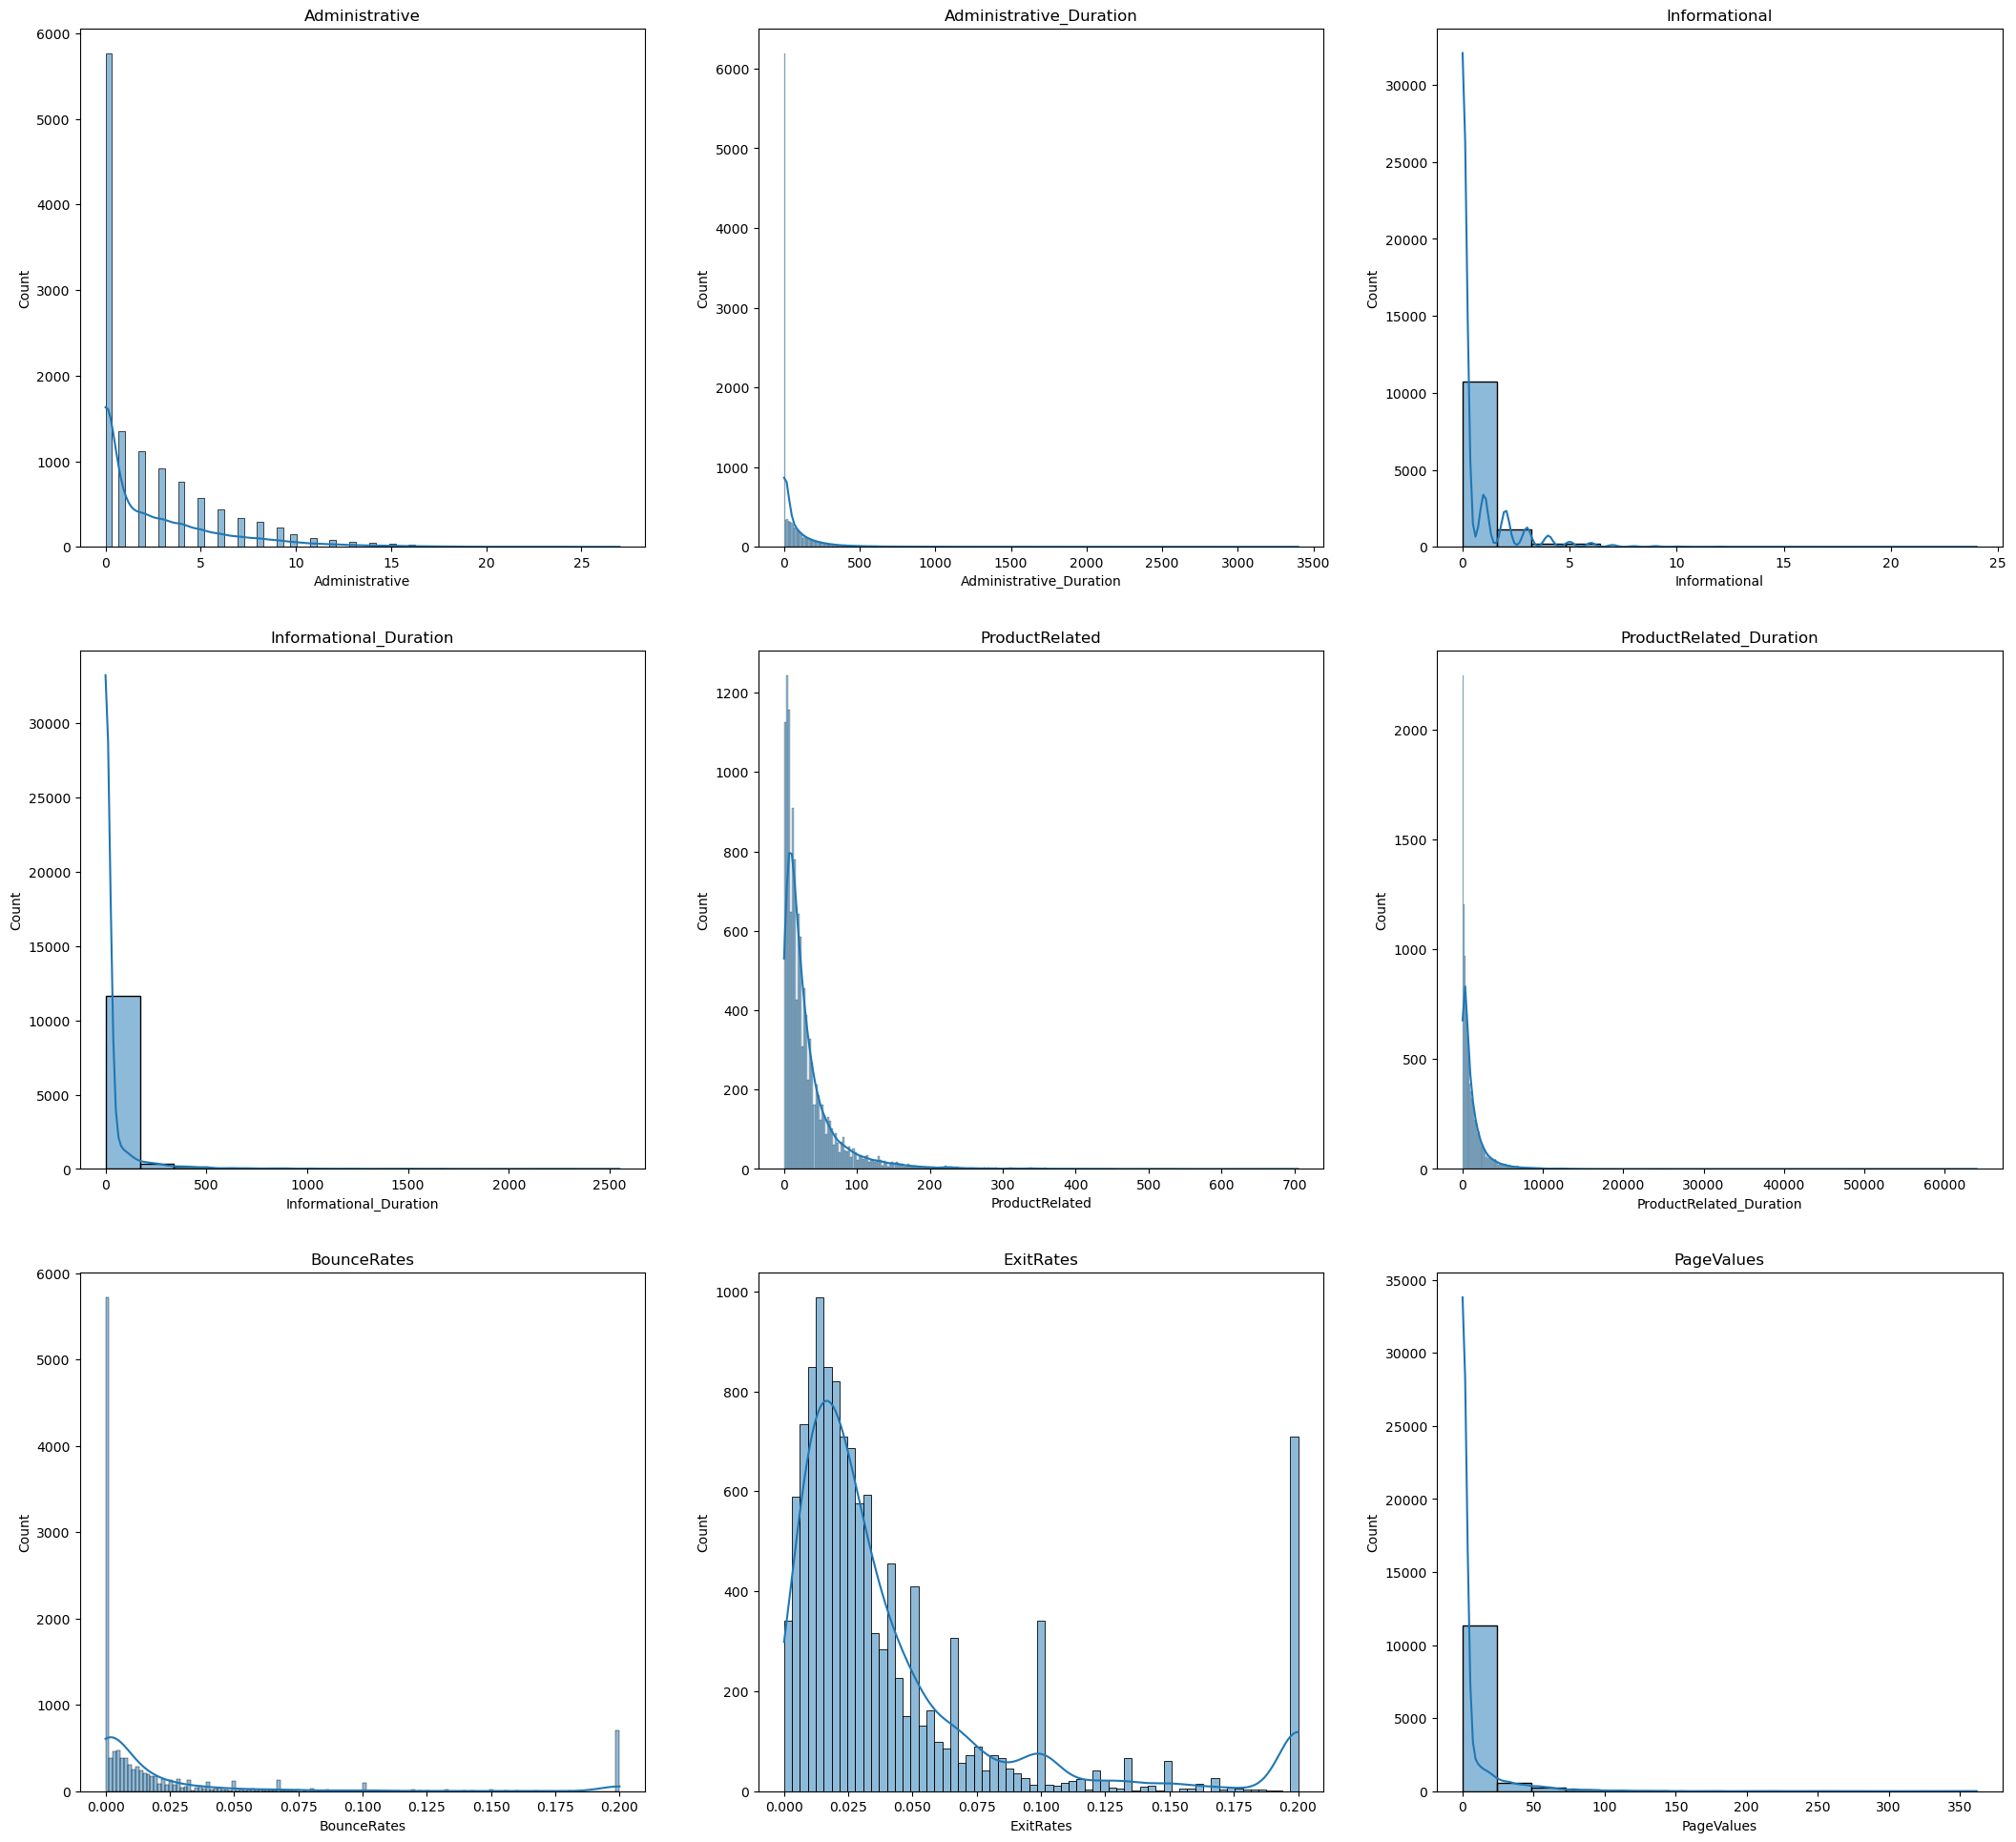

In [13]:
# Visualisasi histogram untuk melihat distribusi data numerical
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(26, 24), gridspec_kw={"hspace": 0.2, "wspace": 0.2}
)
for variable, subplot in zip(nums, ax.flatten()):
    if variable in df.columns:
        sns.histplot(df[variable], ax=subplot, kde=True)
        subplot.set(title=variable)
    else:
        fig.delaxes(subplot)

plt.show()

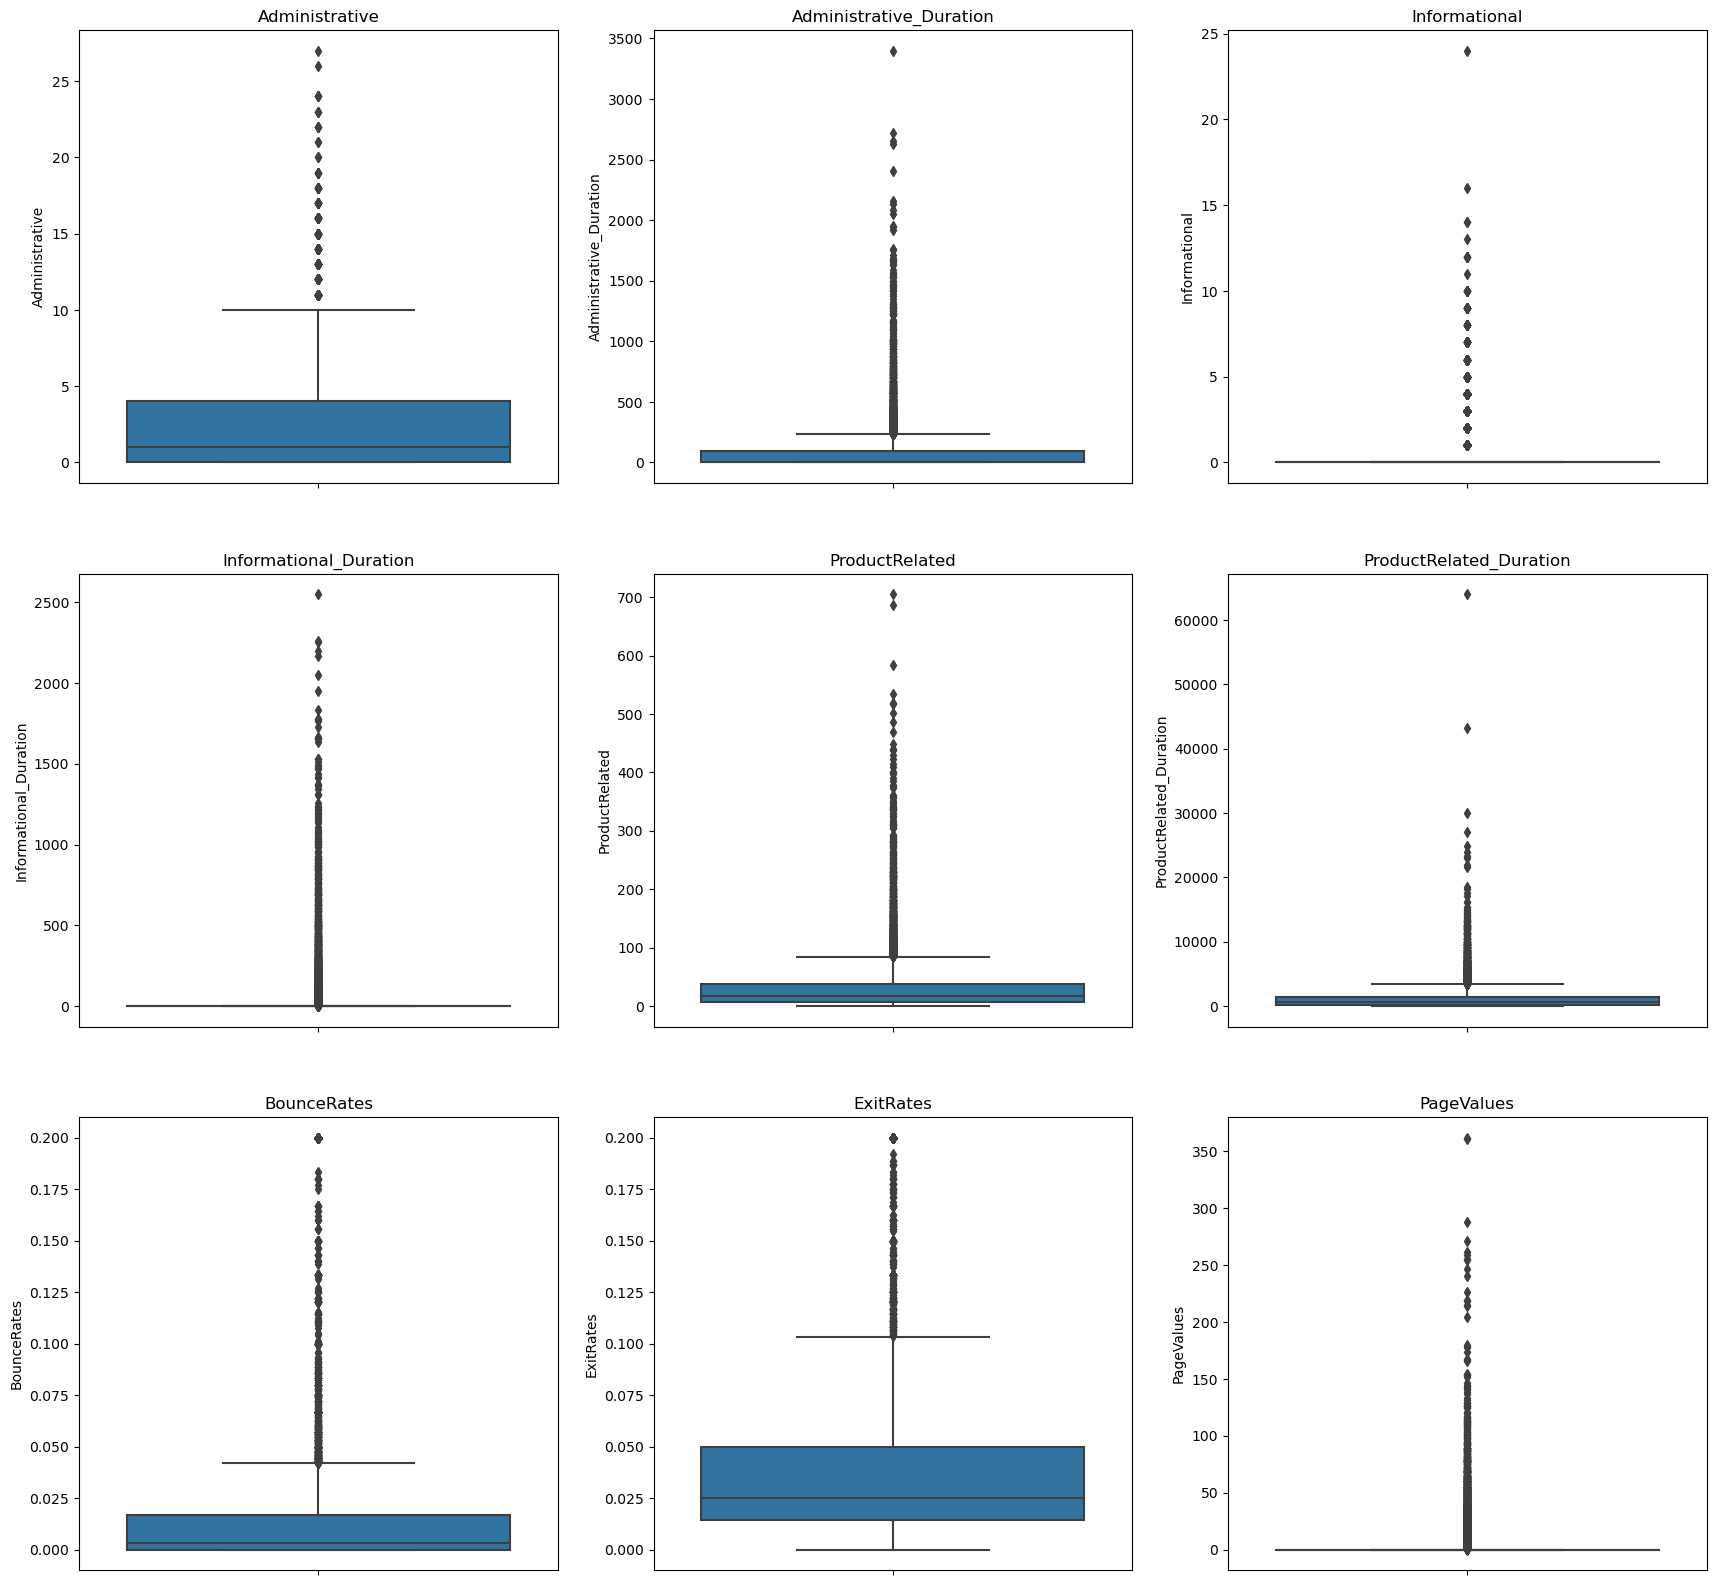

In [14]:
# Visualisasi boxplot untuk melihat outlier data numerical
fig2, ax2 = plt.subplots(
    nrows=3, ncols=3, figsize=(21, 20), gridspec_kw={"hspace": 0.2, "wspace": 0.2}
)
for variable, subplot in zip(nums, ax2.flatten()):
    if variable in df.columns:
        sns.boxplot(y=df[variable], ax=subplot)
        subplot.set(title=variable)
    else:
        fig2.delaxes(subplot)

plt.show()

# save the figure to a file
fig.savefig(
    "Visualisasi boxplot untuk melihat outlier data numerical.png",
    dpi=300,
    bbox_inches="tight",
)

- Berdasarkan histplot diatas, numerical features memiliki distribusi yang skew positif (mean > median) dan tidak bimodal, selain itu jika dilihat dari boxplotnya semua numerical features memiliki outlier besar. 
- Untuk mengatasi data yang skew positif dan beroutlier, terdapat beberapa teknik yang dapat digunakan, antara lain: Transformasi Data, Menghapus Outlier,Menggunakan Metode Non-Parametrik, Menggunakan Model Machine Learning yang Tahan Outlier atau Menggunakan Metode Ensemble. Dari metode-metode tersebut nantinya akan dipilih mana yang paling baik untuk mengatasi outlier pada data yang dimiliki, dengan mengindetifikasi outlier lebih lanjut pada saat preprocessing.

**Interpretasi Univariate Plot untuk Numerical Features**
- Banyak user yang mengunjungi Administrative pages (account management) dilihat jumlah user yang berdistribusi tinggi pada number of pages 0, namun beberapa user juga ada yang mengunjungi beberapa halaman awal saja.
- Karena banyaknya user yang mengunjungi Administrative pages hanya beberapa halaman awal saja, user cenderung tidak banyak menghabiskan waktu pada Administrative pages dan distribusi durasi kunjungan terbanyak pada detik 0.
- Banyak user yang tidak mengunjungi Informational pages (information about shopping site), namun ada juga beberapa customer yang mengunjungi beberapa halaman awal saja.
- Karena banyaknya user yang tidak mengunjungi Informational pages atau hanya beberapa halaman awal saja yang dikunjungi, maka user tidak banyak menghabiskan waktu pada Informational pages dan distribusi durasi kunjungan terbanyak pada detik 0. 
- Banyak user yang mengunjungi Product Related pages setidaknya 1 halaman, namun ada juga beberapa user yang tidak mengunjungi atau bahkan mengunjungi Product Related pages sebanyak diatas 100 halaman.
- Banyak user mengunjungi Product Related pages dengan durasi kunjungan antara 0 sampai dengan 100 detik
- Bounce rates Dari grafik diatas dapat menunjukkan bahwa kebanyakan orang bahkan tidak mengunjungi, dan hanya sedikit orang mengunjungi dan pindah halaman
- Banyak pengunjung keluar dari halaman Exit rates berkisaran pada nilai 25-50 detik, namun ada juga yang mencapai 200 detik
- Page value rendah dikarenakan banyaknya user yang hanya mengunjungi sedikit pages (hanya di halaman awal) dan tidak melanjutkan ke halaman transaksi dari shopping site kita

##### **Categorical Features Univariate Analysis**

In [15]:
# define the order of the categories
month_order = ["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# convert the 'Month' column to a Categorical data type with the defined order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# sort the data frame based on the 'Month' column
df = df.sort_values("Month")

Hal ini dilakukan bertujuan untuk mengurutkan data pada kolom 'Month' berdasarkan urutan bulan secara sistematis.


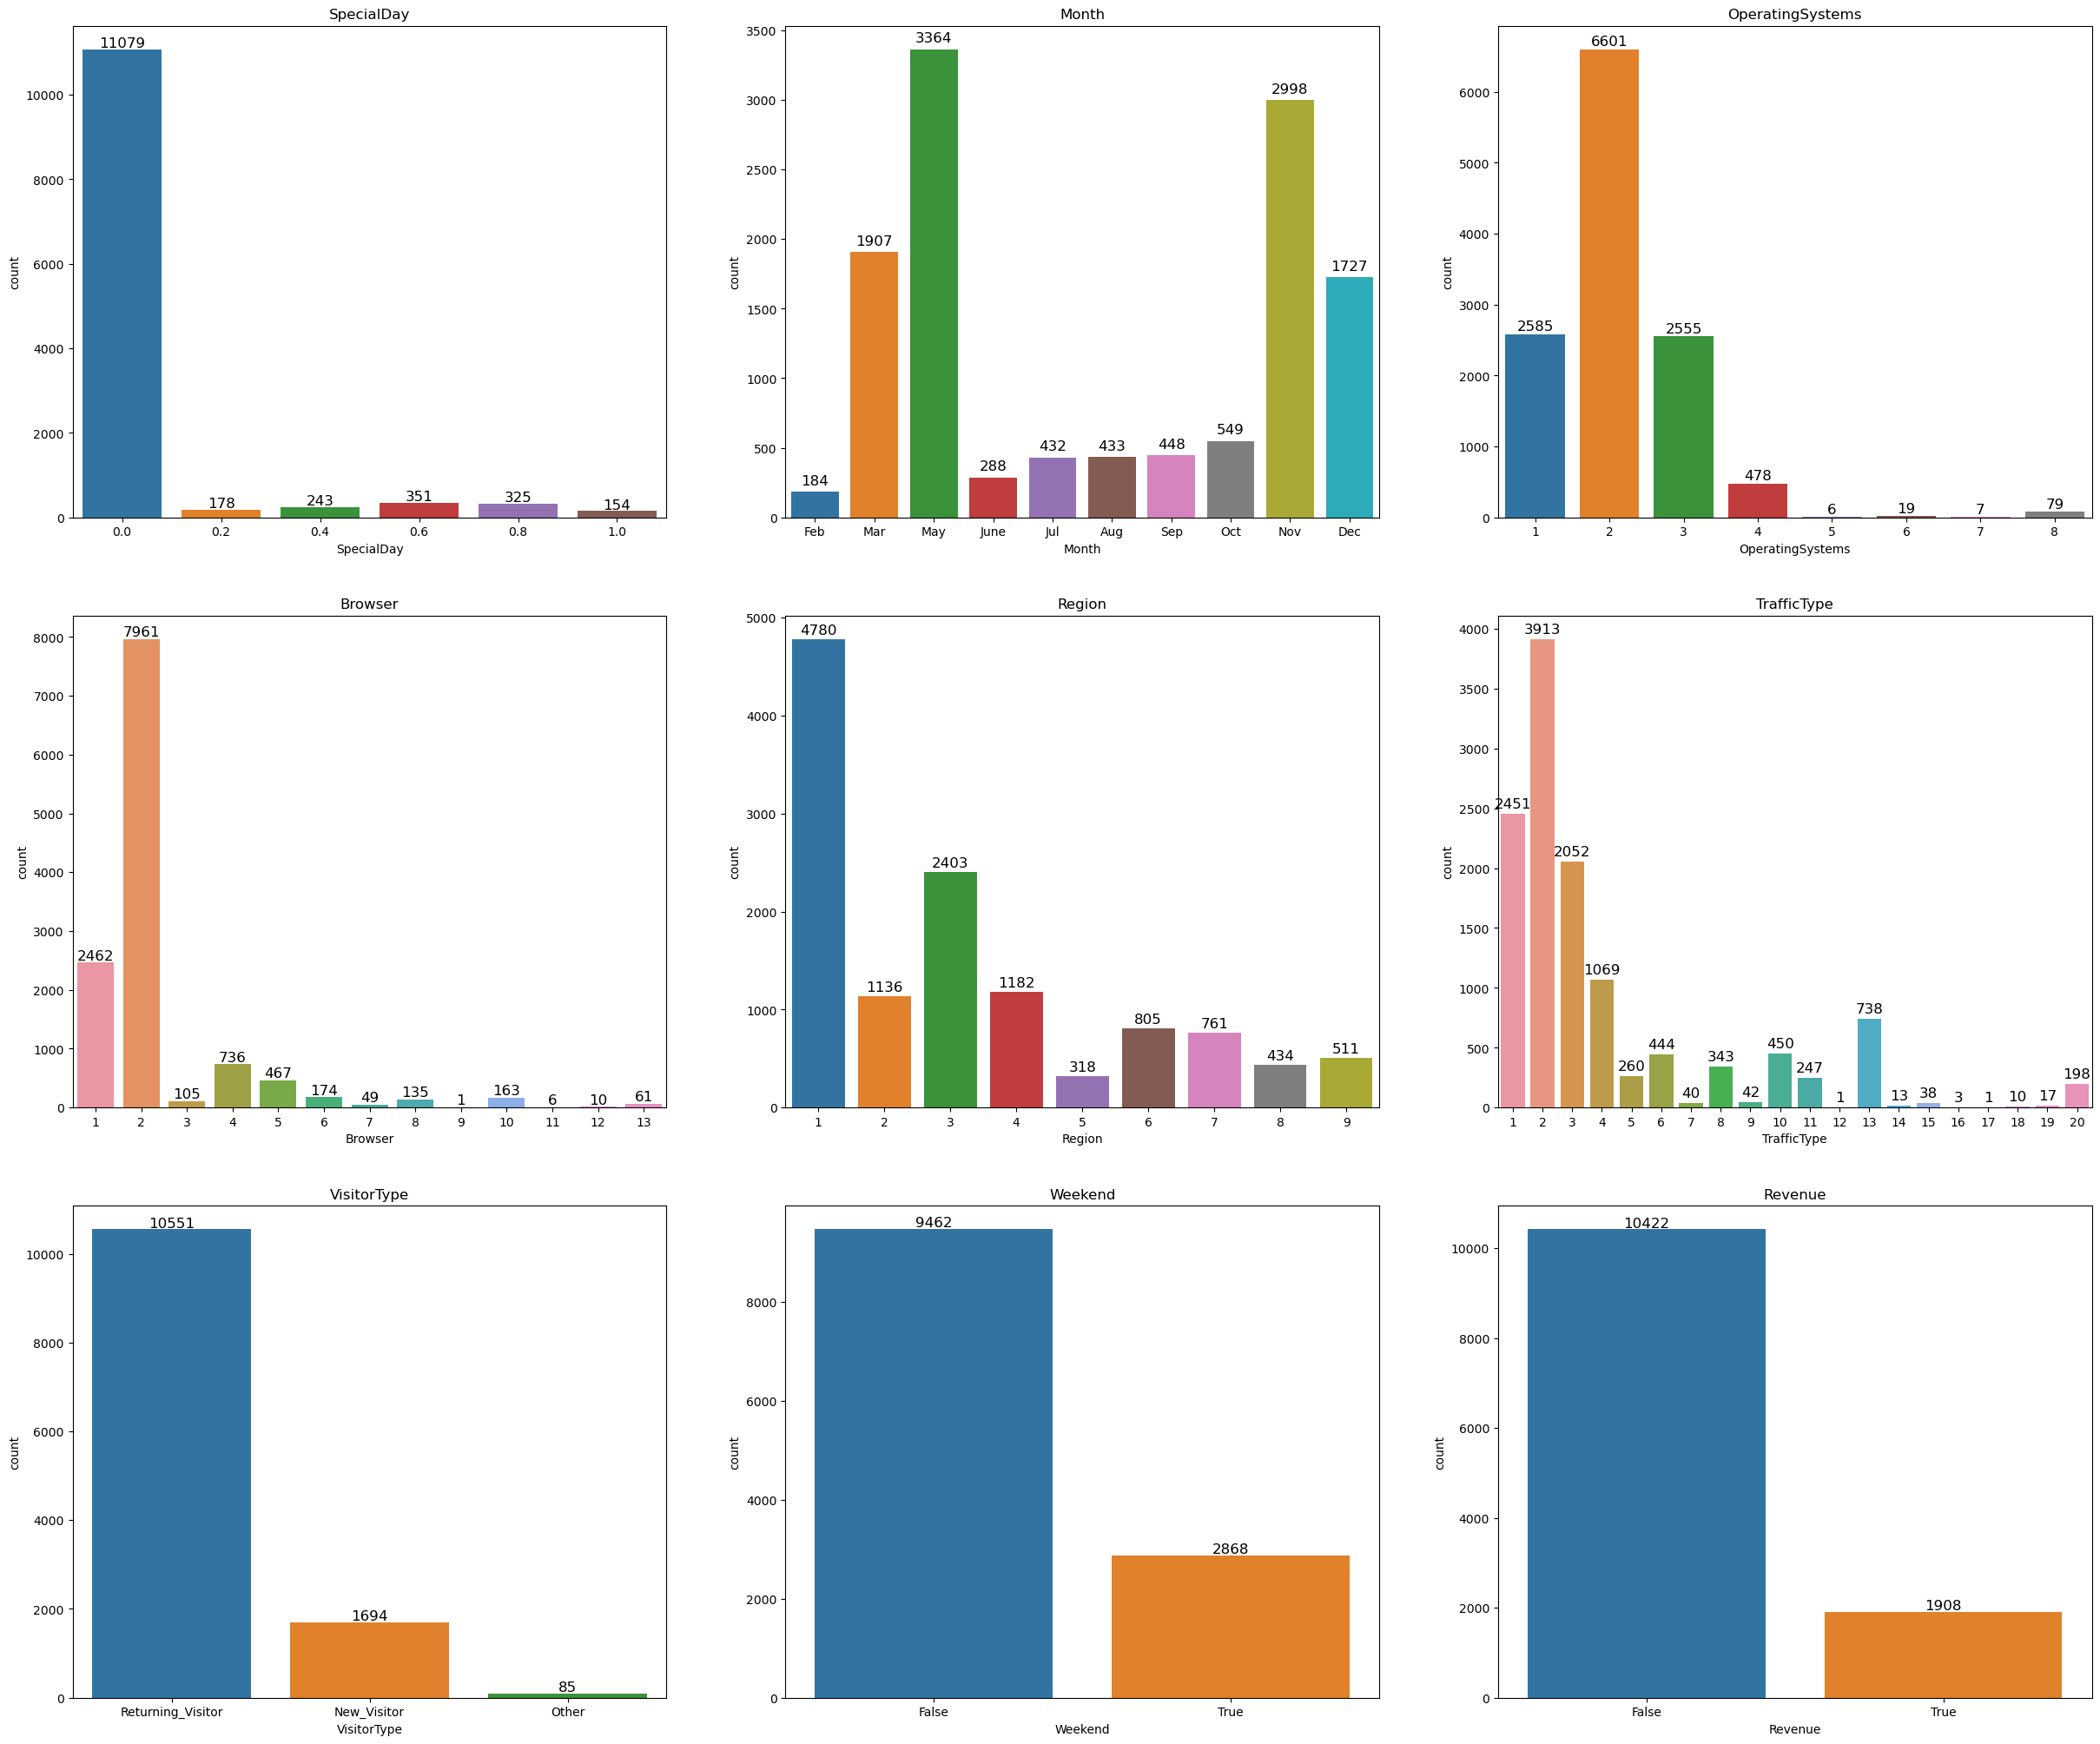

In [16]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(30, 25), gridspec_kw={"hspace": 0.2, "wspace": 0.2}
)
for i, subplot in enumerate(ax.flatten()):
    variable = nominal[i]
    if variable in df.columns:
        sns.countplot(data=df, x=variable, ax=subplot)
        subplot.set(title=variable)

        # Menambahkan persentase untuk setiap kategori
        totals = float(len(df[variable]))
        for patch in subplot.patches:
            height = patch.get_height()
            # subplot.text(patch.get_x()+patch.get_width()/2., height+60, '{:.2f}%'.format((height/totals)*100), ha="center", fontsize=8) # Untuk menunjukan persen di atas bar
            subplot.text(
                patch.get_x() + patch.get_width() / 2.0,
                height + 50,
                "{:.0f}".format(height),
                ha="center",
                fontsize=12,
            )  # Untuk menunjukan angka di atas bar

    else:
        fig.delaxes(subplot)

plt.show()

# save the figure to a file
fig.savefig(
    "Categorical Features Univariate Analysis.png", dpi=300, bbox_inches="tight"
)

In [17]:
# persentase tiap nominal kategori
for col in nominal:
    print("Persentase Pengunjung pada feature", col, ":")
    print((df[col].value_counts(normalize=True) * 100).round(2))
    print("\n")

Persentase Pengunjung pada feature SpecialDay :
0.0    89.85
0.6     2.85
0.8     2.64
0.4     1.97
0.2     1.44
1.0     1.25
Name: SpecialDay, dtype: float64


Persentase Pengunjung pada feature Month :
May     27.28
Nov     24.31
Mar     15.47
Dec     14.01
Oct      4.45
Sep      3.63
Aug      3.51
Jul      3.50
June     2.34
Feb      1.49
Name: Month, dtype: float64


Persentase Pengunjung pada feature OperatingSystems :
2    53.54
1    20.97
3    20.72
4     3.88
8     0.64
6     0.15
7     0.06
5     0.05
Name: OperatingSystems, dtype: float64


Persentase Pengunjung pada feature Browser :
2     64.57
1     19.97
4      5.97
5      3.79
6      1.41
10     1.32
8      1.09
3      0.85
13     0.49
7      0.40
12     0.08
11     0.05
9      0.01
Name: Browser, dtype: float64


Persentase Pengunjung pada feature Region :
1    38.77
3    19.49
4     9.59
2     9.21
6     6.53
7     6.17
9     4.14
8     3.52
5     2.58
Name: Region, dtype: float64


Persentase Pengunjung pada feature T

**Interpretasi Univariate Countplot untuk Categorical Features**
- Sebanyak 89.9% user lebih dominan berkunjung di waktu yang tidak dekat dengan Special Day.
- Jumlah user terbanyak yang mengunjungi shopping site terdapat pada bulan Mei (27.28%), disusul dengan bulan November (24.32%) dan Maret (15.47%). Namun pada bulan Februari memiliki pengunjung yang rendah walaupun dalam bulan Februari terdapat special days (Valentine's day). Bulan Januari dan April tidak termasuk ke dalam dataset ini. **Untuk selanjutnya dalam perekaman dan perekapan data perlu dilakukan  secara lengkap setiap waktu atau bulannya agar hasil analisis dan model yang kita buat tepat dan terhindar dari kesalahan pengambilan keputusan.**
- OS 2 merupakan operating system yang lebih banyak digunakan oleh user dalam mengunjungi shopping site, disusul dengan OS 1 dan 3. 
- Browser 2 merupakan browser yang paling banyak digunakan oleh user dalam mengunjungi shopping site sebesar 64.57% user yang berkunjung, disusul dengan Browser 1 dan 4.
- Region 1 memiliki jumlah user yang paling banyak mengunjungi shopping site yaitu sebesar 38.77% user yang berkunjung, disusul dengan Region 3 dan 4.
- Traffic Type 2 merupakan sumber traffic yang paling banyak digunakan untuk user mengunjungi shopping site, sebanyak 31.74% user yang berkunjung, kemudian disusul dengan sumber traffic type 1 dan 3.
- Sebanyak 85.57% Returning visitor merupakan user yang paling banyak mengunjungi shopping site.
- Sebanyak 76.74% user melakukan transaksi pada di hari selain Weekend.
- Hanya 15.47% atau 1908 user yang berkunjung dan melakukakan transaksi. **Dikarena feature target (Revenue) memiliki persentase data 84.53% false dan hanya 15.47% yang true, sehingga dasatet ini dapat dikatakan sebagai imbalance data. Oleh karena itu perlu dilakukan metode Class Weight untuk mengatasinya.**

----------------------------------------------------------

### **Bivariate Analysis and Multivariate Analysis**

#### **Numerical Features vs Revenue**

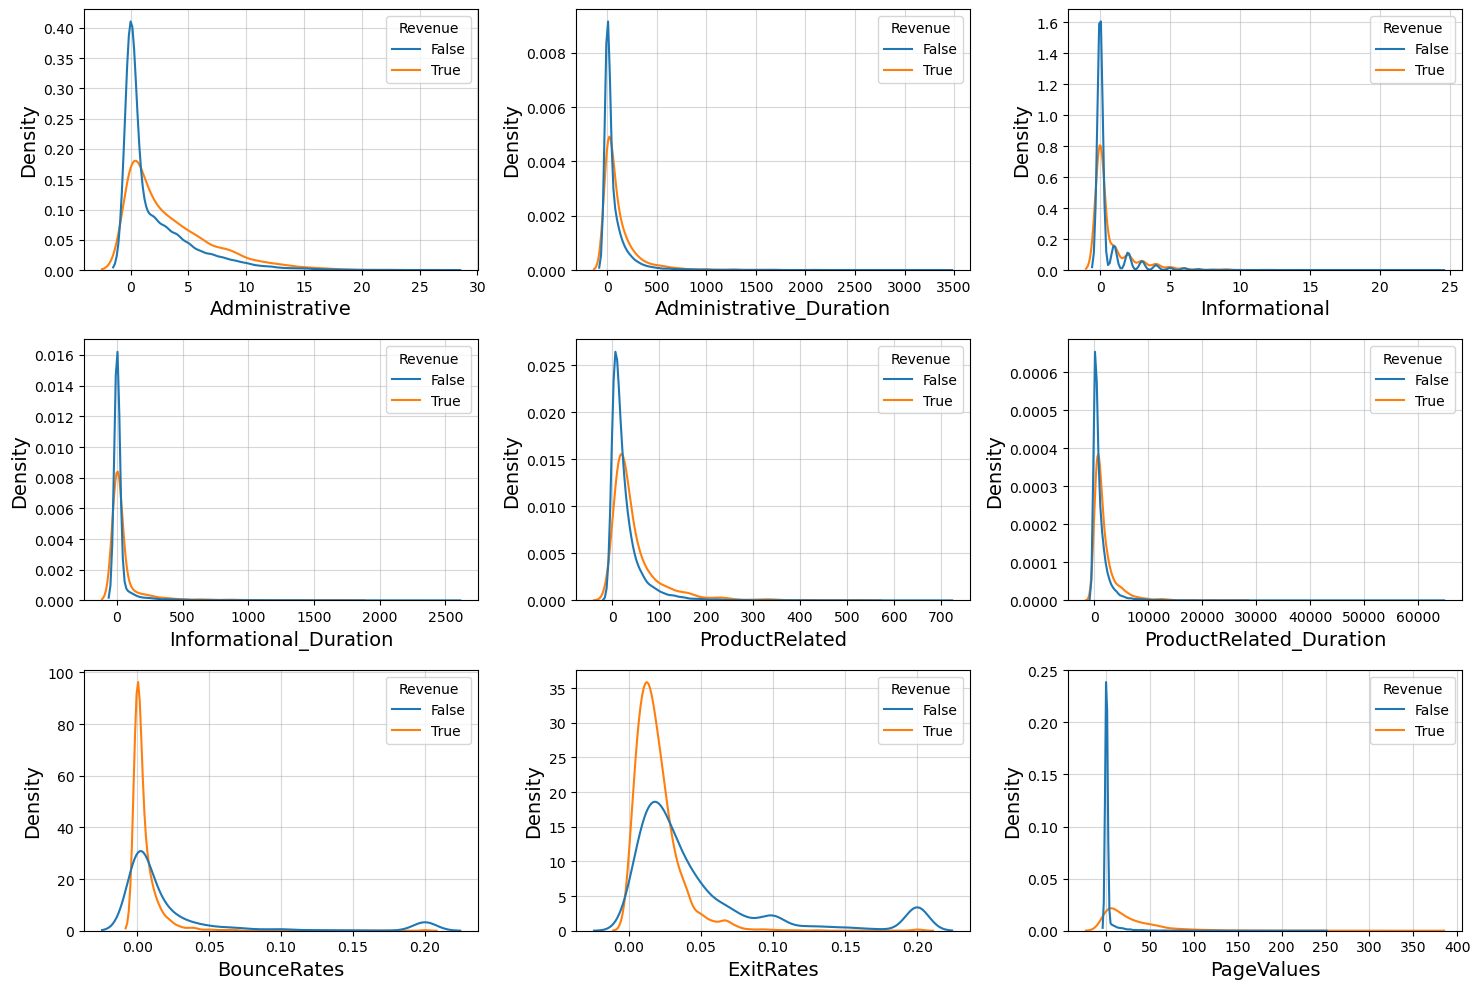

In [18]:
# KDE PLOT NUMERICAL FEATURES VS REVENUE

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for col, ax in zip(continuous, axs.flat):
    sns.kdeplot(
        x=df[col],
        hue=df["Revenue"],
        common_norm=False,
        ax=ax,
    )
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    ax.grid(axis="x", alpha=0.5)
    ax.grid(axis="y", alpha=0.5)

plt.tight_layout()
plt.show()

# save the figure to a file
fig.savefig("Numerical Features vs Revenue.png", dpi=300, bbox_inches="tight")

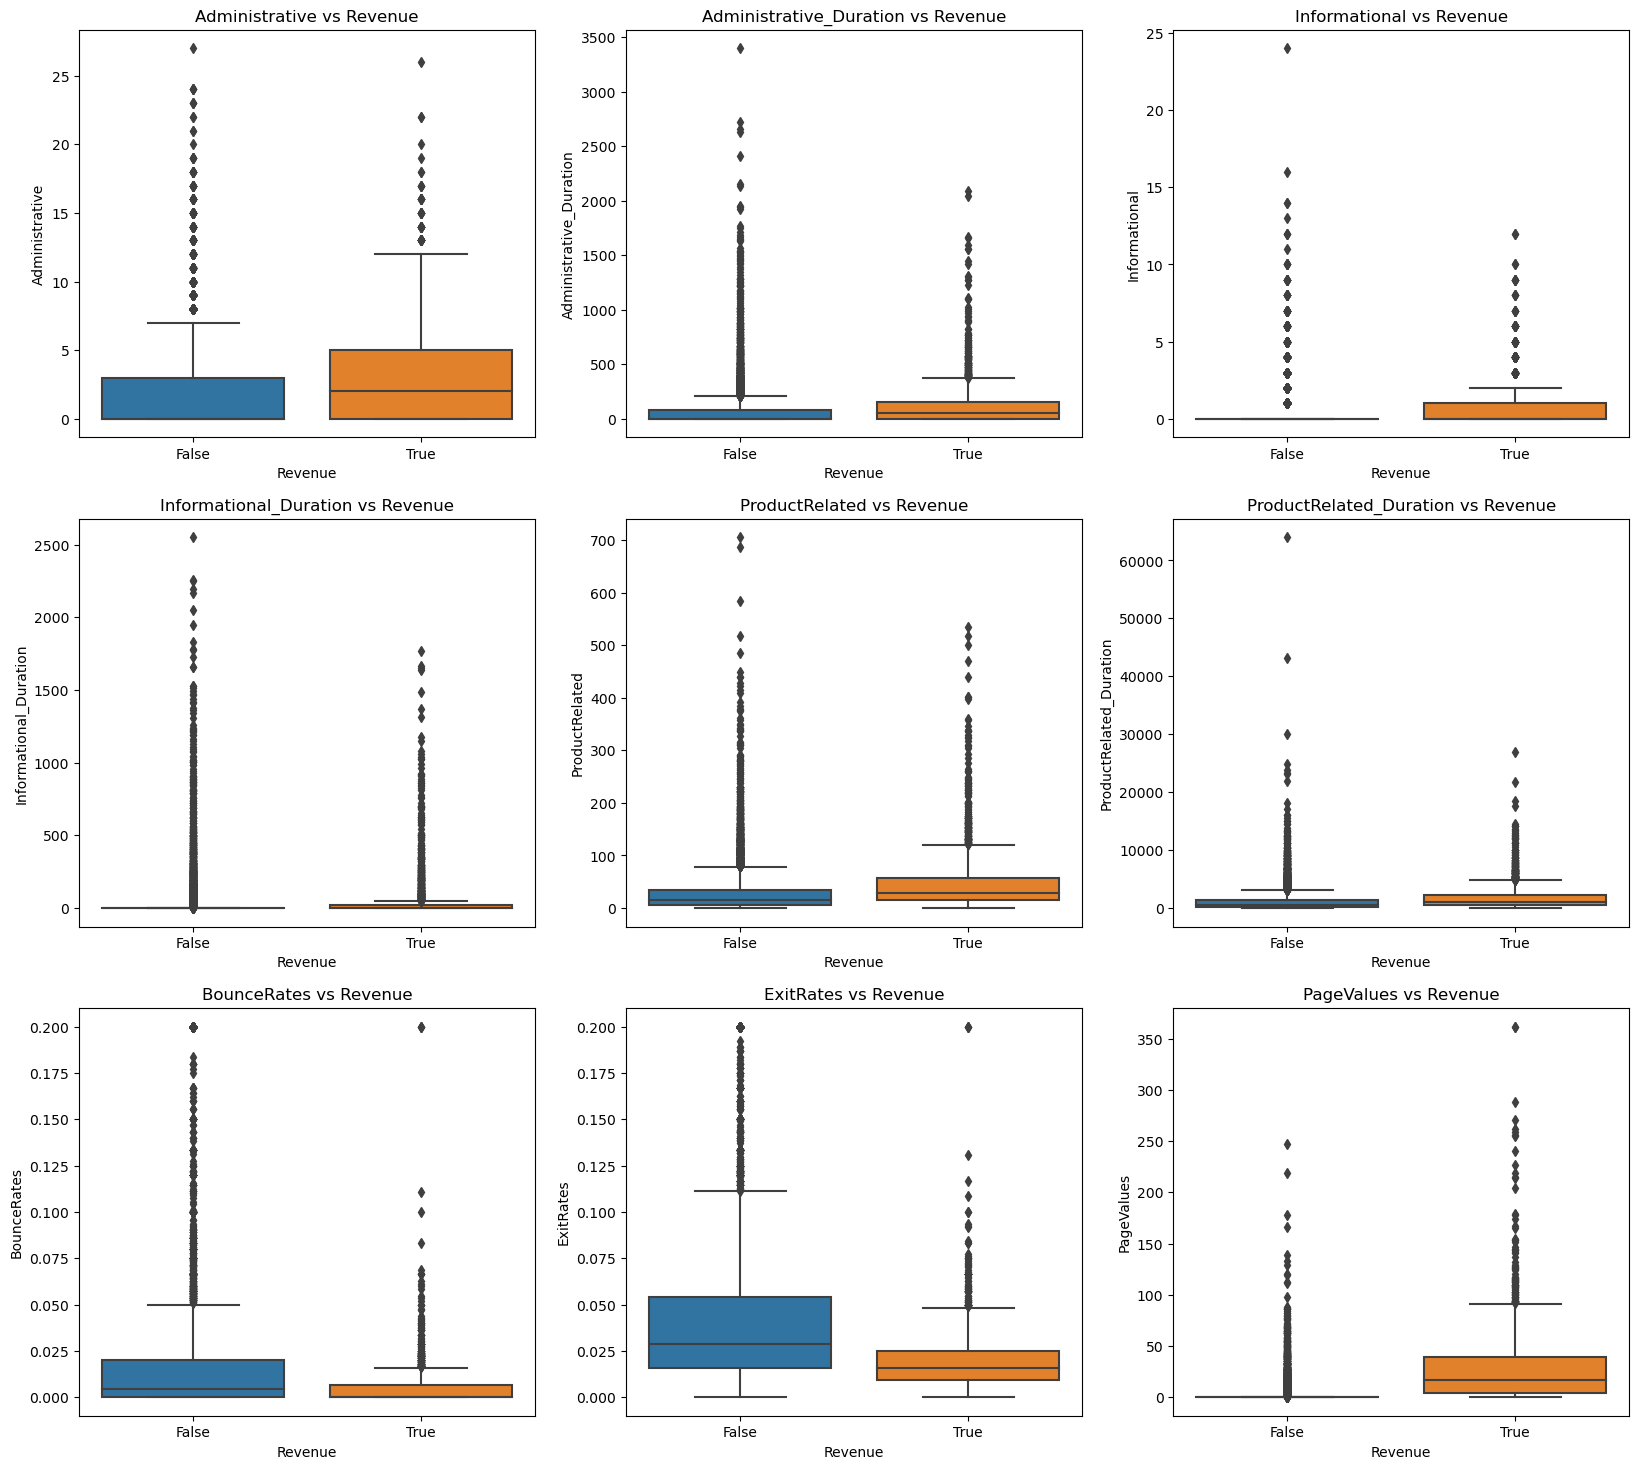

In [19]:
# BOX PLOT NUMERICAL FEATURES VS REVENUE

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 18))

# Loop through variables and plot boxplots
for i, var in enumerate(continuous):
    row = i // 3
    col = i % 3
    sns.boxplot(x="Revenue", y=var, data=df, ax=axs[row, col])
    axs[row, col].set_title(f"{var} vs Revenue")

# Show plot
plt.show()

# save the figure to a file
fig.savefig("BOX PLOT NUMERICAL FEATURES VS REVENUE.png", dpi=300, bbox_inches="tight")

**Interpretasi Bivariate Plot untuk Numerical Features vs Revenue**
- Pada Administrative dan Administrative_Duration menunujukkan bahwa setiap kali pengunjung yang mengunjungi halaman bukan berarti mereka membeli.
- Pada Informasi dan Information_Duration menunjukkan bahwa orang menghabiskan waktu membaca halaman informasi untuk memutuskan membeli sesuatu atau tidak. Dan kebanykan pengunjung hanya berkunjung dan tidak membeli.
-ProductRelated dan ProductRelated_Duration menunjukkan banyak pengunjung mengunjungi halaman terkait produk dan menghabiskan waktu disana dengan jumlah paling banyak mengunjungi halaman terkait sebesar 0-400. 
-Tingginya angka BouncesRates dan ExitRates menunjukkan bahwa kedua fitur tersebut tidak menghasilkan revenue


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Categorical Features vs Revenue**

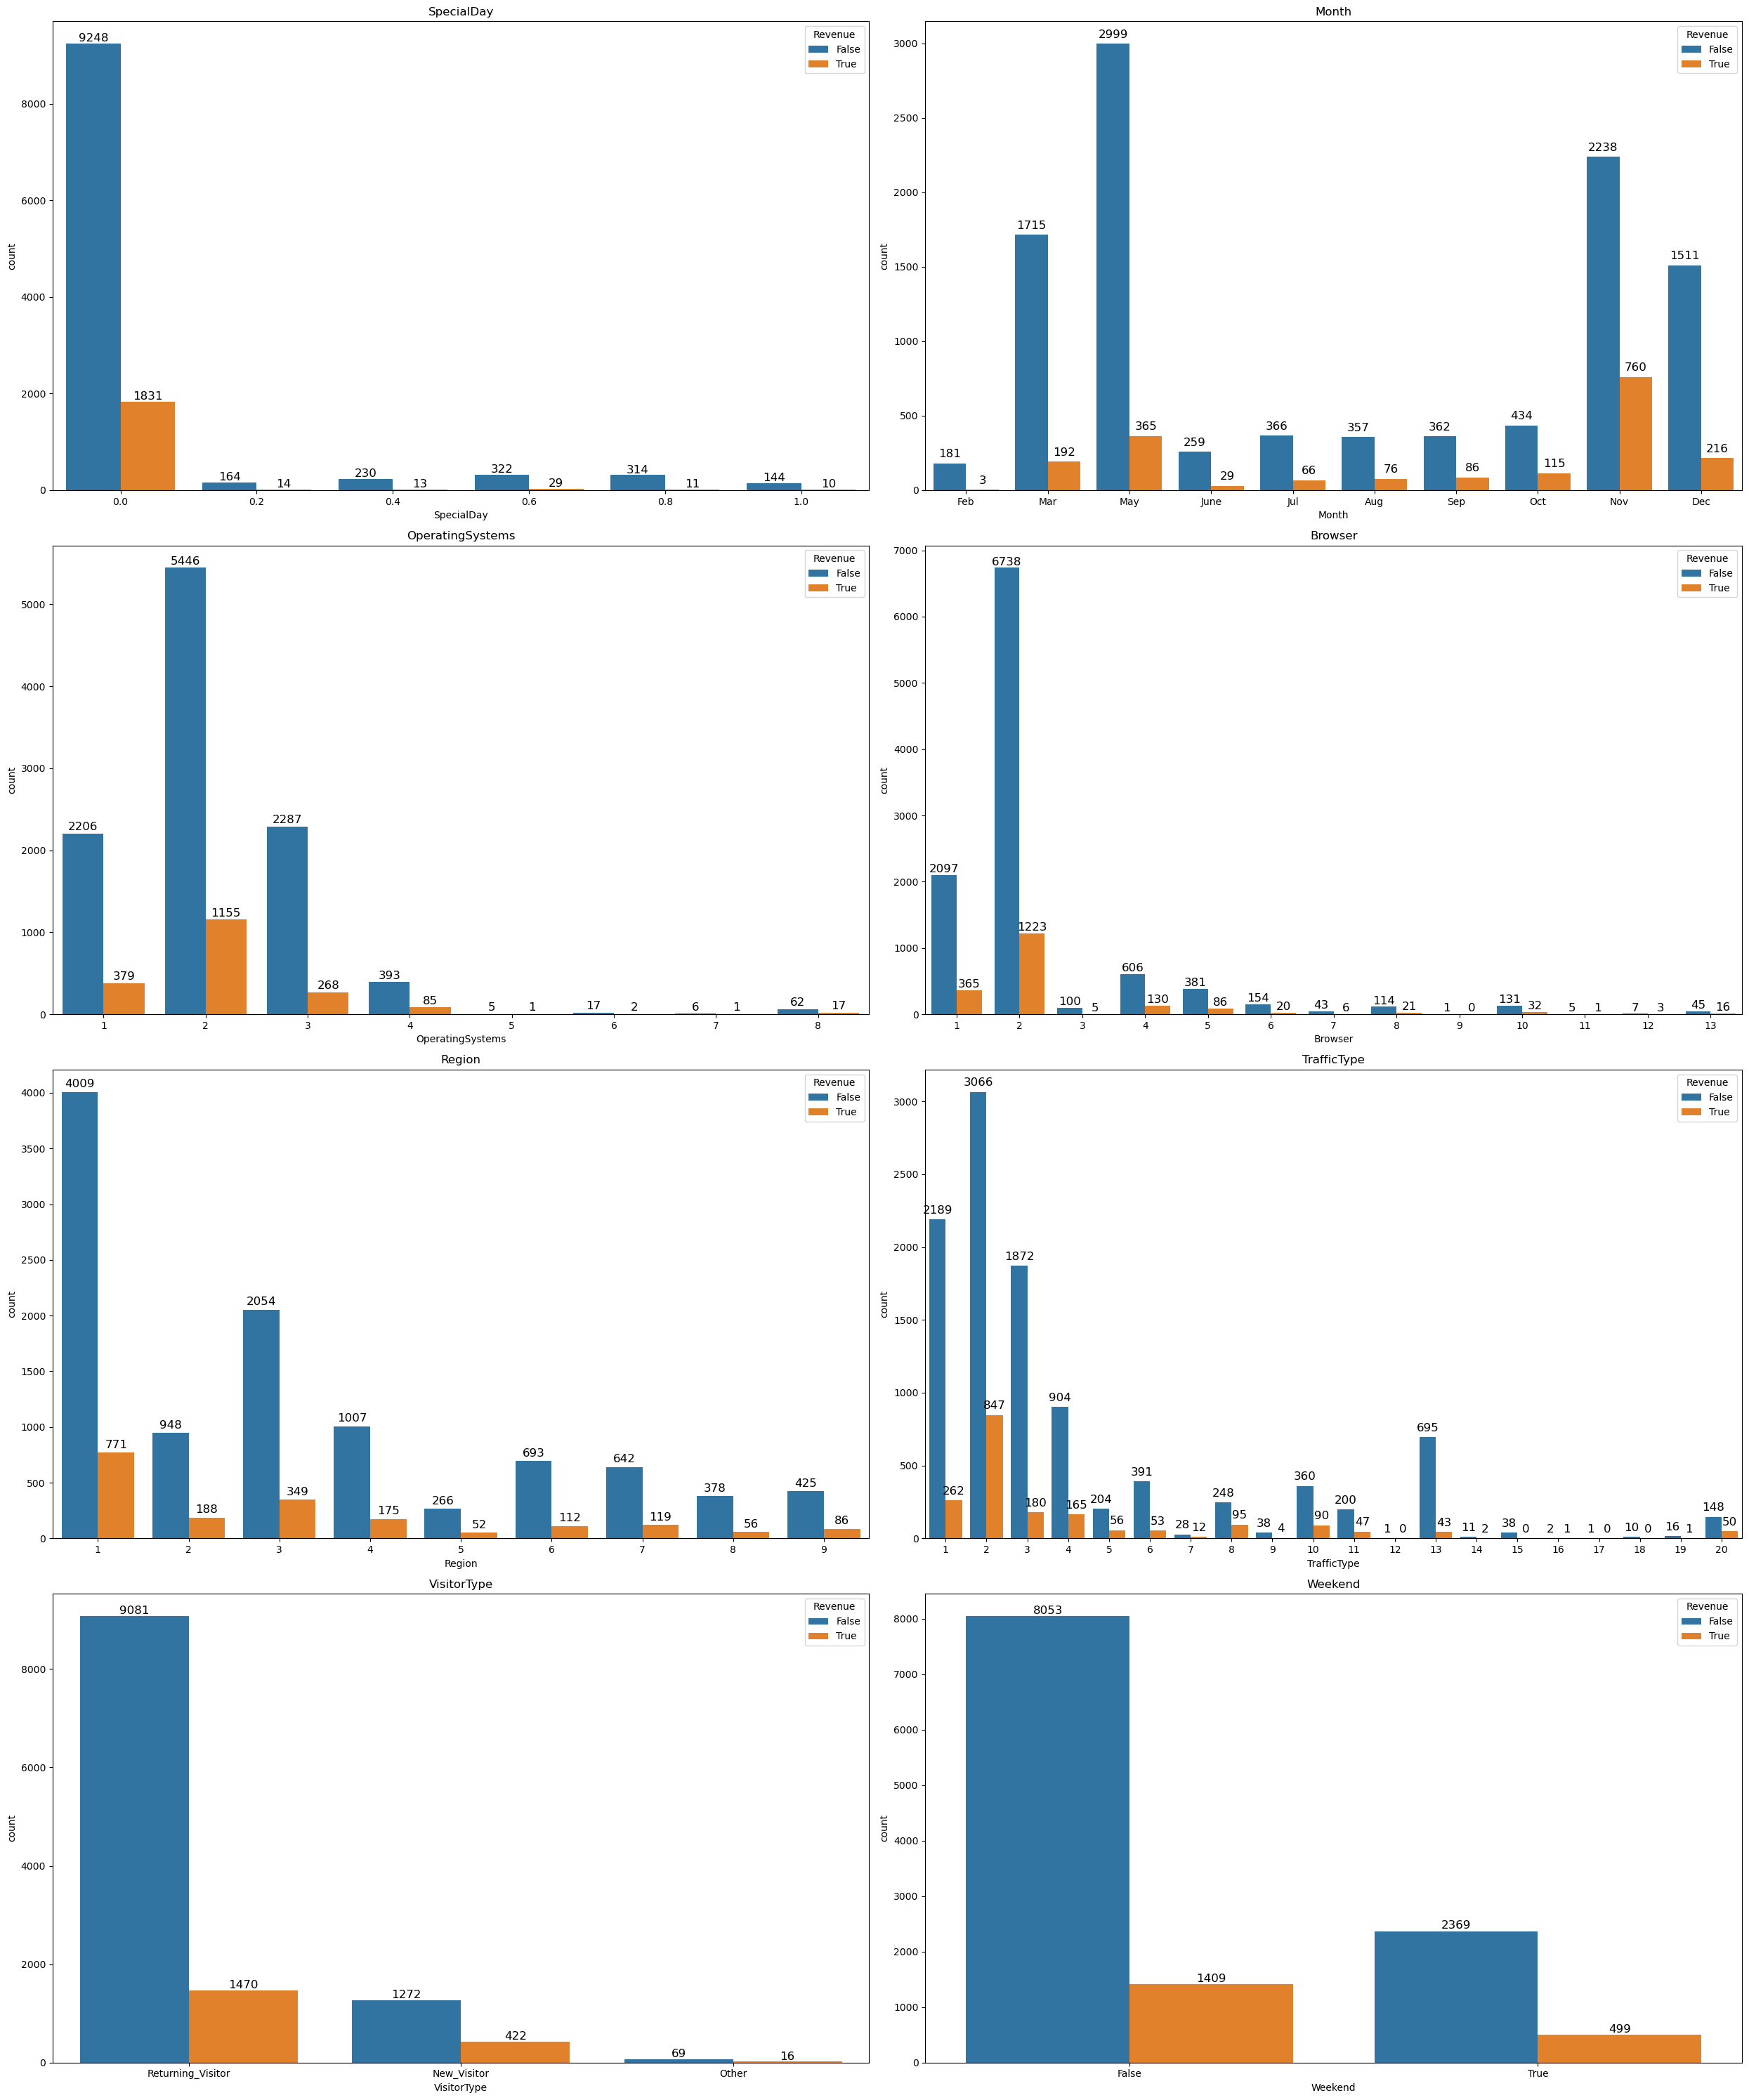

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(25, 30))
for i, var in enumerate(nominal[:-1]):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=var, hue="Revenue", ax=ax[row, col])
    ax[row, col].set_title(var)
    ax[row, col].legend(title="Revenue", loc="upper right")

    # Add labels on top of bars
    totals = float(len(df[var]))
    for patch in ax[row, col].patches:
        height = patch.get_height()
        ax[row, col].text(
            patch.get_x() + patch.get_width() / 2.0,
            height + 40,
            "{:.0f}".format(height),
            ha="center",
            fontsize=12,
        )

plt.tight_layout()
plt.show()

# save the figure to a file
fig.savefig("Categorical Features vs Revenue.png", dpi=300, bbox_inches="tight")

In [21]:
# persentase tiap nominal kategori
for col in nominal:
    print("Persentase Pengungjung Pada Feature", col, ":")
    print((df.groupby(col)["Revenue"].value_counts(normalize=True) * 100).round(2))
    print("\n")

Persentase Pengungjung Pada Feature SpecialDay :
SpecialDay  Revenue
0.0         False      83.47
            True       16.53
0.2         False      92.13
            True        7.87
0.4         False      94.65
            True        5.35
0.6         False      91.74
            True        8.26
0.8         False      96.62
            True        3.38
1.0         False      93.51
            True        6.49
Name: Revenue, dtype: float64


Persentase Pengungjung Pada Feature Month :
Month  Revenue
Feb    False      98.37
       True        1.63
Mar    False      89.93
       True       10.07
May    False      89.15
       True       10.85
June   False      89.93
       True       10.07
Jul    False      84.72
       True       15.28
Aug    False      82.45
       True       17.55
Sep    False      80.80
       True       19.20
Oct    False      79.05
       True       20.95
Nov    False      74.65
       True       25.35
Dec    False      87.49
       True       12.51
Name: Revenu

**Interpretasi Bivariate Countplot untuk Categorical Features vs Revenue**
- Persentase pengunjung pada feature Special day yang banyak melakukan transaksi (Revenue) pada 0.0 sebanyak 16.53% sedangkan pada 1.0 ada 6.49% banyak pengunjung yang melakukan transaksi. Dapat dilihat dari persentase diatas daya minat beli user lebih condong sebelum Special day.
- Jumlah user yang paling banyak melakukan transaksi pada bulan November sebesar 25.35%, bulan Oktober 20.95%, dan bulan September 19.20%. Namun pada bulan Mei paling banyak pengunjung yang tidak melakukan transaksi.
- Pada feature OperatyngSistem jumlah pengunjung yang banyak melakukan transaksi pada OS 4 sebesar 17.78% dan pada OS 2 sebesar 17.50%.
- Jumlah user yang paling banyak melakukan transaksi terdapat pada browser 12 sebesar 30.00% dan browser 13 sebesar 26.23%.
- Jumlah user terbanyak melakukan transaksi terdapat pada region 9 sebesar 16.83%, region 2 sebesar 16.55%, dan region 5 sebesar 16.35%.
- TrafficType 7 terdapat 30.00% pengunjung yang banyak melakukan transaksi dan traffictype 8 sebesar 27.70%.
- Banyak new visitor yang melakukan transaksi sebesar 24.91%
- Jumlah pengunjung yang melakukan transaksi pada weekend sebesar 17.40%



#### **Correlation - Multivariate Analysis**

Feature Administrative: 242.586667
Feature Administrative_Duration: 108.928515
Feature Informational: 112.751843
Feature Informational_Duration: 61.306613
Feature ProductRelated: 317.844350
Feature ProductRelated_Duration: 293.027603
Feature BounceRates: 286.375674
Feature ExitRates: 552.286502
Feature PageValues: 3949.262960


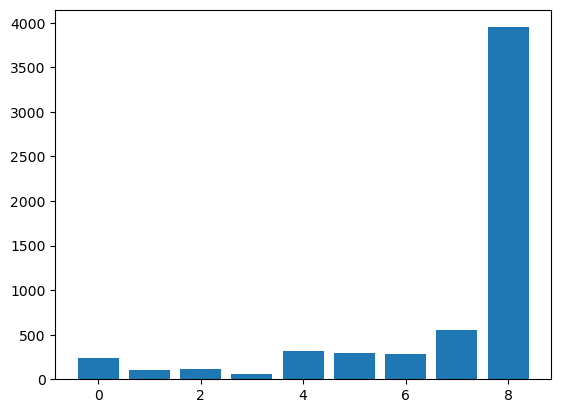

In [22]:
# split into input (Xnum) and output (ynum) variables
Xnum = df[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
        "BounceRates",
        "ExitRates",
        "PageValues",
    ]
].values
# target variable
ynum = df["Revenue"].values

# feature selection
def select_features(X, y, feature_names):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k="all")
    # learn relationship from data
    fs.fit(X, y)
    # transform input data
    X_fs = fs.transform(X)

    # print feature scores
    for i in range(len(fs.scores_)):
        print("Feature %s: %f" % (feature_names[i], fs.scores_[i]))

    return X_fs, fs


# get feature names
feature_names = df.select_dtypes(include="number").columns.tolist()
# feature selection
Xnum_fs, fs = select_features(Xnum, ynum, feature_names)
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature SpecialDay: 53.797094
Feature Month: 86.163696
Feature OperatingSystems: 1.037132
Feature Browser: 8.873291
Feature Region: 3.037565
Feature TrafficType: 1.283194
Feature VisitorType: 37.547523
Feature Weekend: 8.120464


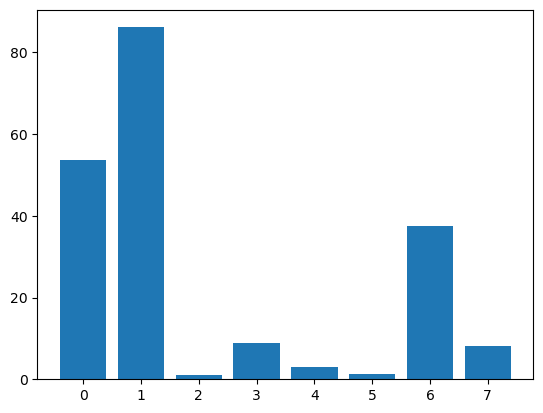

In [23]:
# Chi-Squared Feature Selection

# split into input (X) and output (y) variables
Xcat = df[
    [
        "SpecialDay",
        "Month",
        "OperatingSystems",
        "Browser",
        "Region",
        "TrafficType",
        "VisitorType",
        "Weekend",
    ]
].values
ycat = df["Revenue"].values

# encode categorical features
cat_cols = [1, 6, 7]
le = LabelEncoder()
for i in cat_cols:
    Xcat[:, i] = le.fit_transform(Xcat[:, i])

# feature selection
fs = SelectKBest(score_func=chi2, k="all")
fs.fit(Xcat, ycat)
Xcat_fs = fs.transform(Xcat)

# get feature names
feature_names = [
    "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
]

# print feature names and their scores
for i in range(len(fs.scores_)):
    print("Feature %s: %f" % (feature_names[i], fs.scores_[i]))

# plot the scores
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xticks(range(len(fs.scores_)), range(len(fs.scores_)))
plt.show()

Berdasarkan Tes Korelasi  Numerical Features terhadap Target dengan tes ANOVA, Feature Page Value terlihat berkorelasi kuat dengan Revenue. Feature Exit Rates dan Product Related juga dapat dikatakan cukup berkorelasi dengan Revenue, disusul dengan Product Related Duration dan Bounce Rates.
<p>Exit Rates dengan Bounce Rates dan Product Related dan Product Related Duration memiliki korelasi yang bersifat redundan atau multicollinearity, sehingga kita memilih Exit Rates dan Product Related untuk diketahui lebih lanjut.

## **Business Insight & Recommendation** 


- Jumlah revenue atau pendapatan yang didapat dari pelanggan lama atau yang kembali lebih banyak daripada pelanggan baru. Namun, tingkat konversi pelanggan baru lebih tinggi dibandingkan dengan pelanggan lama. Dari total pengujung sebanyak 85% merupakan pengunjung kembali ke situs dan 15% pengunjung adalah baru. Kita dapat memberikan tawaran atau campaign untuk menarik lebih banyak pengunjung baru agar tertarik melakukan pembelian pada situs web dan membuat pelanggan lama untuk melakukan transaksi kembali di situs web.
- Sebanyak 65% pengunjung berasal dari browser 2 dan lebih dari 85% pengunjung berasal dari browser 1 dan 2. Kita dapat membuat situs web menjadi lebih menarik, interaktif, dan responsif terhadap browser ini. Selain itu, untuk meningkatkan konversi pada browser lainnya, kita dapat memasang iklan situs web pada browser lainnya.
- Wilayah 1 menyumbang penjualan lebih banyak diikuti oleh wilayah 3. Dengan informasi ini, dapat direncanakan campaign dan penyediaan pasokan barang dengan cara yang lebih baik. Sebagai contoh, kita mungkin mengusulkan untuk membangun gudang yang khusus melayani kebutuhan wilayah 1 untuk meningkatkan tingkat pengiriman dan memastikan bahwa produk dengan permintaan tertinggi selalu tersedia dengan baik.
- Pengunjung situs web tertinggi di bulan Mei, tetapi jumlah pembelian atau transaksi paling besar terjadi di bulan November. Hal ini perlu diselidiki lebih lanjut oleh tim bisnis untuk mengetahui apa yang menyebabkan atau faktor yang mempengaruhi tingginya transaksi pada bulan november
-  Sekitar 95% pengunjung menggunakan operating system (OS) 1, 2, atau 3. Dengan mengetahui OS apa saja yang sering digunakan pelanggan untuk melakukan transaksi, bisa menjadi bahan pertimbangan jika kita ingin membuat aplikasi belanja yang user friendly. Dengan adanya aplikasi yang tersedia di aplikasi store di masing-masing OS dapat lebih memudahkan customer melakukan pencarian atau pembelian, serta memudahkan kita memberikan promosi dengan membuat notifikasi aplikasi.
- Rata-rata pengeluaran pada halaman administratif, informasi, dan produk terkait lebih tinggi bagi mereka yang membeli sesuatu daripada mereka yang tidak membeli apa-apa.
- Rata-rata Bounce Rate dan Exit Rate lebih rendah saat ada penjualan produk.
- Halaman-halaman dengan nilai halaman tinggi memiliki bounce rate yang lebih rendah. Kita harus berbicara dengan tim teknologi kami untuk menemukan cara meningkatkan nilai halaman dari halaman web.
- Konversi pengunjung pada hari weekdays lebih banyak yang tidak melakukan transaksi dibandingkan dengan hari weekend, namun jumlah pengunjung pada hari weekend masih terlalu rendah. Solusi yang akan kami lakukan adalah memprioritaskan pada hari weekend yang memiliki potensi konversi lebih tinggi dari hari weekdays dengan memberikan rekomendasi promosi diskon produk di hari weekend



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Preprocessing Data

### Split Data

In [24]:
df_copy = df.copy()
nums = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
]
num_data = df_copy[nums]
cats = [
    "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
    "Revenue",
]
cats_data = df_copy[cats]

In [25]:
# Memisahkan target variabel dari fitur
X = df_copy.drop("Revenue", axis=1)
y = df_copy["Revenue"]  # drop kolom 'Revenue' dari X

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Menampilkan ukuran data pelatihan dan pengujian
print("Jumlah baris dan kolom data pelatihan:", X_train.shape)
print("Jumlah baris dan kolom data pengujian:", X_test.shape)

Jumlah baris dan kolom data pelatihan: (9864, 17)
Jumlah baris dan kolom data pengujian: (2466, 17)


## Feature Extraction
Membuat feature baru yang sudah ada

In [26]:
df_copy["Total_visit_duration"] = (
    df_copy["Administrative_Duration"]
    + df_copy["Informational_Duration"]
    + df_copy["ProductRelated_Duration"]
)
df_copy["Total_visit_duration"] = df_copy["Total_visit_duration"].astype("int64")
df_copy["Total_visit_duration"].dtype

dtype('int64')

In [27]:
df_copy["Total_pageviews"] = (
    df_copy["Administrative"] + df_copy["Informational"] + df_copy["ProductRelated"]
)
df_copy["Total_pageviews"].dtype

dtype('int64')

In [28]:
df_copy[["Total_visit_duration", "Total_pageviews"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_visit_duration,12330.0,1309.654015,2037.739593,0.0,222.0,680.0,1626.75,69921.0
Total_pageviews,12330.0,34.550203,46.514053,0.0,8.0,20.0,42.00,746.0


Feature Administrative: 242.586667
Feature Administrative_Duration: 108.928515
Feature Informational: 112.751843
Feature Informational_Duration: 61.306613
Feature ProductRelated: 317.844350
Feature ProductRelated_Duration: 293.027603
Feature BounceRates: 286.375674
Feature ExitRates: 552.286502
Feature PageValues: 3949.262960
Feature Total_visit_duration: 307.726915
Feature Total_pageviews: 341.208963


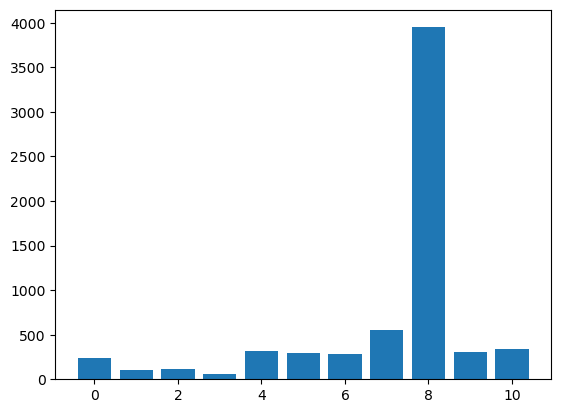

In [29]:
nums = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "Total_visit_duration",
    "Total_pageviews",
]
num_data = df_copy[nums]

cats = [
    "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
    "Revenue",
]
cats_data = df_copy[cats]

# split into input (Xnum) and output (ynum) variables
Xnum = df_copy[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
        "BounceRates",
        "ExitRates",
        "PageValues",
        "Total_visit_duration",
        "Total_pageviews",
    ]
].values
# target variable
ynum = df_copy["Revenue"].values

# feature selection
def select_features(X, y, feature_names):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k="all")
    # learn relationship from data
    fs.fit(X, y)
    # transform input data
    X_fs = fs.transform(X)

    # print feature scores
    for i in range(len(fs.scores_)):
        print("Feature %s: %f" % (feature_names[i], fs.scores_[i]))

    return X_fs, fs


# get feature names
feature_names = df_copy[nums].columns.tolist()

# feature selection
Xnum_fs, fs = select_features(Xnum, ynum, feature_names)
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Feature Tambahan (selain yang sudah tersedia di dataset) 
Untuk membantu membuat performansi model yang akan datang semakin bagus

- UserID / Invoice sebagai identifier untuk mencegah data duplikat
- Date-time untuk mengoptimalkan waktu yang tepat untuk campaign notification
- Gender untuk mengoptimalkan halaman rekomendasi
- Tanggal lahir (DDMMYYYY)
- Tanggal registrasi / tanggal checkout

## Feature Selection

In [30]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the pipeline to evaluate
model = LogisticRegression(solver="liblinear")
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[("anova", fs), ("lr", model)])
# define the grid
grid = dict()
grid["anova__k"] = [i + 1 for i in range(Xnum.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring="accuracy", n_jobs=-1, cv=cv)
# perform the search
results = search.fit(Xnum, ynum)
# summarize best
print("Best Mean Accuracy: %.3f" % results.best_score_)
print("Best Config: %s" % results.best_params_)

Best Mean Accuracy: 0.883
Best Config: {'anova__k': 2}


>1 0.883 (0.006)
>2 0.883 (0.007)
>3 0.882 (0.006)
>4 0.882 (0.006)
>5 0.881 (0.006)
>6 0.881 (0.006)
>7 0.881 (0.006)
>8 0.881 (0.006)
>9 0.881 (0.006)
>10 0.881 (0.006)
>11 0.881 (0.006)


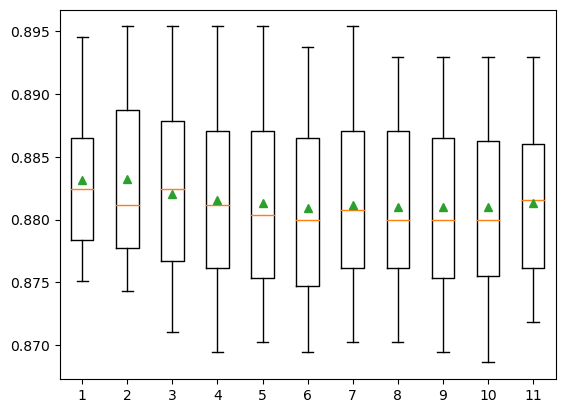

In [31]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(
        model, X, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise"
    )
    return scores


# define number of features to evaluate
num_features_cv = [i + 1 for i in range(Xnum.shape[1])]
# enumerate each number of features
results = list()
for k in num_features_cv:
    # create pipeline
    model = LogisticRegression(solver="liblinear")
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[("anova", fs), ("lr", model)])
    # evaluate the model
    scores = evaluate_model(pipeline, Xnum, ynum)
    results.append(scores)
    # summarize the results
    print(">%d %.3f (%.3f)" % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features_cv, showmeans=True)
pyplot.show()

In [32]:
# Model Built Using All Features

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc


# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    Xcat, ycat, test_size=0.2, random_state=42
)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver="lbfgs")
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print("Accuracy: %.2f" % (accuracy * 100))

Accuracy: 84.91


In [33]:
# Model Built Using Chi-Squared Features

# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k=4)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs
 
# load the dataset
df = pd.read_csv('online_shoppers_intention.csv')
Xcat = df[['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']].values
ycat = df['Revenue'].values
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xcat, ycat, test_size=0.2, random_state=42)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 83.33


In [34]:
# Model Built Using Mutual Information Features

# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=mutual_info_classif, k=4)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs
 
# load the dataset
df = pd.read_csv('online_shoppers_intention.csv')
Xcat = df[['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']].values
ycat = df['Revenue'].values
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xcat, ycat, test_size=0.2, random_state=42)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.33


Berdasarkan Tes Korelasi Categorical Features terhadap Target dengan tes Chi Square, Feature Special Day terlihat berkorelasi kuat dengan Revenue. Feature Traffic Type dan Month juga dapat dikatakan cukup berkorelasi baik dengan Revenue.
<p>Korelasi kuat antara Special Day dan Revenue dapat diasumsikan jika mendekati Special Day, user akan melakukan transaksi karena banyak promo atau ingin memberikan hadiah ke orang lain.


## Missing Data

In [35]:
df_copy.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Total_visit_duration       0
Total_pageviews            0
dtype: int64

Tidak terdapat data yang hilang

## Duplicated Data

In [36]:
df_copy.duplicated().sum()

125

In [37]:
# df_copy = df_copy.drop_duplicates()

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Terdapat 125 data yang duplikat namun data tersebut tidak dihandle dikarenakan tidak adanya feature identifier

## Handling Outlier

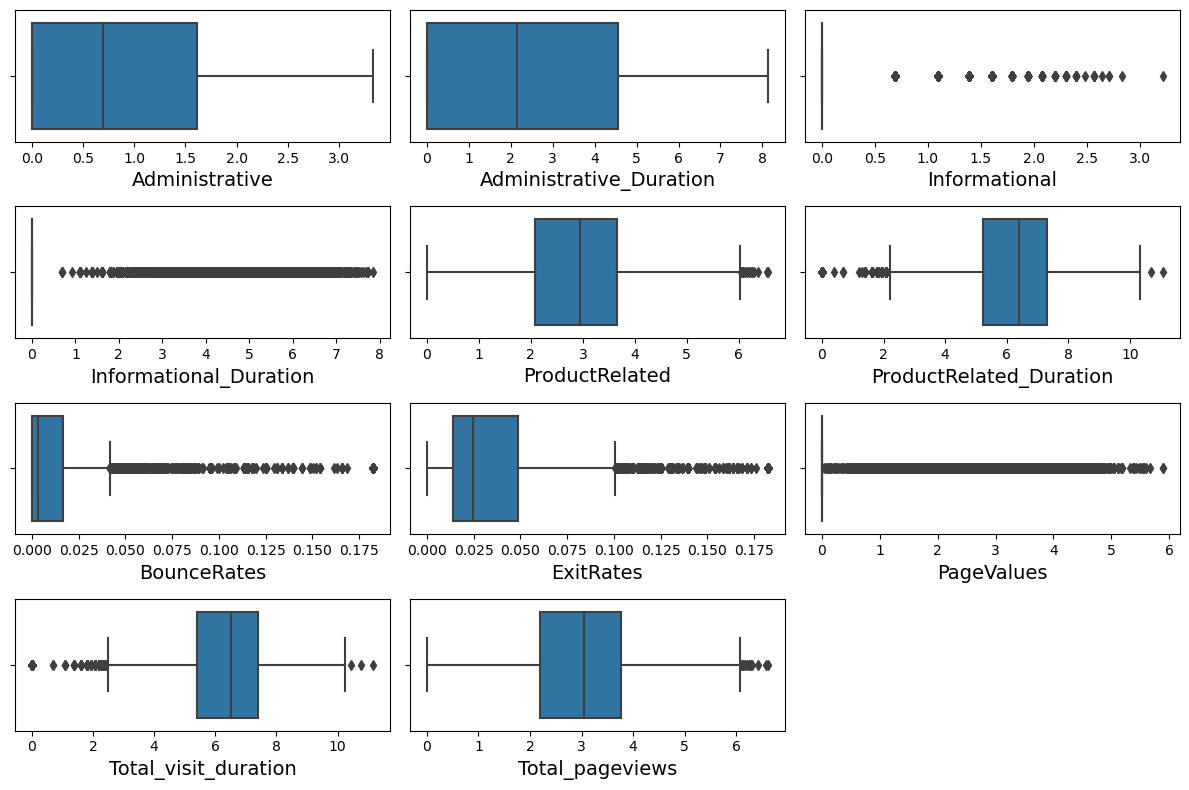

In [39]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_data):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=np.log1p(num_data[col]), orient="v")
    plt.xlabel(col, fontsize=14)
    plt.tight_layout()

plt.show()

# save the figure to a file
fig.savefig("BOX POT OUTLIER.png", dpi=300, bbox_inches="tight")

## Feature Encoding

### Data Binning

In [40]:
# Binning pada OperatingSystems
# df_copy['OperatingSystems'] = df_copy['OperatingSystems'].apply(lambda x: x if x in [1, 2, 3, 4] else 'other')

# Binning pada Browser
# df_copy['Browser'] = df_copy['Browser'].apply(lambda x: x if x in [1, 2, 4, 5] else 'other')

# Binning pada TrafficType
# df_copy['TrafficType'] = df_copy['TrafficType'].apply(lambda x: x if x in [1, 2, 3, 4, 13] else 'other')

# Binning pada SpecialDay
# df_copy['SpecialDay'] = df_copy['SpecialDay'].apply(lambda x: 1 if x > 0.5 else 0)

Feature categorical tidak dilakukan binning

### One Hot dan Label Encoding

In [41]:
# One-hot encoding pada kolom Month, VisitorType, dan Weekenddf_copy.head(['SpecialDay','Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType', 'Weekend']).T

# Inisialisasi objek OneHotEncoder
encoder = OneHotEncoder()

# Pilih kolom-kolom yang akan di-encode
cat_cols = [
    "SpecialDay",
    "Month",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "VisitorType",
    "Weekend",
]

# Lakukan one-hot encoding pada kolom-kolom tersebut
cat_data_encoded = encoder.fit_transform(df_copy[cat_cols])

# Dapatkan daftar kategori dari kolom-kolom tersebut
cat_categories = encoder.categories_

# Gabungkan daftar kategori menjadi nama kolom baru
new_cols = [
    f"{col}_{val}" for col, vals in zip(cat_cols, cat_categories) for val in vals
]

# Konversi hasil encoding menjadi DataFrame
cat_data_encoded = pd.DataFrame(cat_data_encoded.toarray(), columns=new_cols)

# Label encoding pada kolom 'Revenue' dalam y
le = LabelEncoder()
y = le.fit_transform(y)

# Konversi kolom target 'Revenue' menjadi DataFrame
y = pd.DataFrame(y, columns=["Revenue"])

# Gabungkan cat_data_encoded dengan y
cat_data_encoded = pd.concat([cat_data_encoded, y], axis=1)

In [42]:
cat_data_encoded.head().T

,0,1,2,3,4
SpecialDay_0.0,1.0,0.0,1.0,1.0,1.0
SpecialDay_0.2,0.0,1.0,0.0,0.0,0.0
SpecialDay_0.4,0.0,0.0,0.0,0.0,0.0
SpecialDay_0.6,0.0,0.0,0.0,0.0,0.0
SpecialDay_0.8,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
VisitorType_Other,0.0,0.0,0.0,0.0,0.0
VisitorType_Returning_Visitor,1.0,1.0,1.0,1.0,1.0
Weekend_False,1.0,1.0,1.0,1.0,1.0
Weekend_True,0.0,0.0,0.0,0.0,0.0


## Feature Transformation

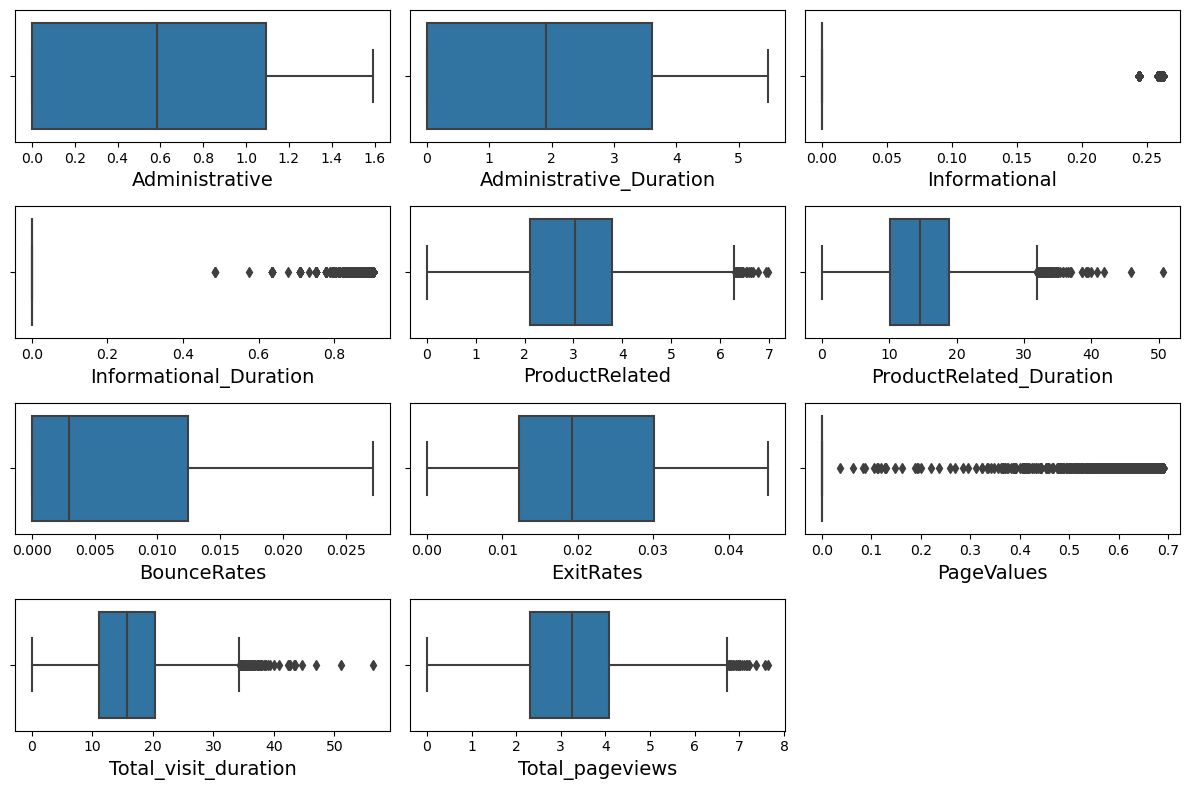

In [43]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_data):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=stats.yeojohnson(num_data[col])[0], orient="v")
    plt.xlabel(col, fontsize=14)
    plt.tight_layout()

plt.show()

# save the figure to a file
fig.savefig("Feature Transformation.png", dpi=300, bbox_inches="tight")

In [44]:
num_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Total_visit_duration,Total_pageviews
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,1309.654015,34.550203
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,2037.739593,46.514053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,222.000000,8.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,680.000000,20.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,1626.750000,42.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,69921.000000,746.000000


## Feature Scaling

In [45]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Transformasi kolom-kolom dalam daftar nums
num_data_scaled = scaler.fit_transform(num_data)

# Buat DataFrame baru untuk data yang sudah di-scaling
num_data_final = pd.DataFrame(num_data_scaled, columns=num_data.columns)

In [46]:
num_data_final.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Total_visit_duration,Total_pageviews
count,1.233000e+04,1.233000e+04,12330.000000,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.766103e-17,-3.457629e-17,0.000000,-1.844069e-17,5.532206e-17,1.844069e-17,3.688137e-17,1.844069e-17,9.220344e-18,-2.766103e-17,-1.844069e-17
std,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-0.396478,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-6.427255e-01,-7.428208e-01
25%,-6.969930e-01,-4.571914e-01,-0.396478,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-5.337768e-01,-5.708228e-01
50%,-3.959377e-01,-4.147639e-01,-0.396478,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.090088e-01,-3.128257e-01
75%,5.072280e-01,7.035981e-02,-0.396478,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,1.556179e-01,1.601688e-01
max,7.431499e+00,1.876956e+01,18.499599,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,3.367169e+01,1.529599e+01


In [47]:
# Gabungkan kembali data yang telah di transformasi dengan data categorical yang sudah di binning
df_final = pd.concat([num_data_final, cat_data_encoded], axis=1)
df_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Total_visit_duration,...,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.642725,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.466151,-0.322820,-0.082695,-0.325141,-0.317178,-0.359557,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.574703,-0.457683,0.657012,-0.317178,-0.596103,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.466790,-0.457683,1.400122,-0.317178,-0.495007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.497361,-0.457683,-0.200423,-0.317178,-0.523471,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


## Handle Class Imbalance

Handle class imbalance akan dilakukan dengan Class Weight yang diimplementasikan langsung pada saat modeling.

# Modeling

In [48]:
import shap
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    fbeta_score,
    make_scorer,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

## A. Split Data Train & Test

In [49]:
# Memisahkan target variabel dari fitur
X = df_final.drop("Revenue", axis=1)
y = df_final["Revenue"]

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Menampilkan ukuran data pelatihan dan pengujian
print("Jumlah baris dan kolom data pelatihan:", X_train.shape)
print("Jumlah baris dan kolom data pengujian:", X_test.shape)

Jumlah baris dan kolom data pelatihan: (9864, 82)
Jumlah baris dan kolom data pengujian: (2466, 82)


## B. Modeling (Algoritma yang diimplementasikan)
- Logistic Regression
- Decision Tree
- Random Forest
- kNN
- SVC
- Ada Boost
- Gradient BoostingClassifier
- XGBoost

In [50]:
# inisialisasi model
models = [
    [
        "Logistic Regression",
        LogisticRegression(class_weight="balanced", random_state=42),
    ],
    ["Decision Tree", DecisionTreeClassifier(class_weight="balanced", random_state=42)],
    ["Random Forest", RandomForestClassifier(class_weight="balanced", random_state=42)],
    ["KNeighborsClassifier", KNeighborsClassifier()],
    ["SVC", SVC(class_weight="balanced", probability=True, random_state=42)],
    ["AdaBoostClassifier", AdaBoostClassifier(random_state=42)],
    ["GradientBoostingClassifier", GradientBoostingClassifier(random_state=42)],
    ["XGBClassifier", XGBClassifier(random_state=42)],
]

## C. Model Evaluation: Pemilihan dan perhitungan metrics model

Metriks evaluasi yang cocok untuk dataset ini adalah precision dan ROC-AUC, karena kedua metriks tersebut digunakan untuk menghitung / memprediksi class yang minoritas (True Revenue)

In [51]:
# membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# list kosong untuk menyimpan hasil evaluasi masing-masing model
results = []

# loop untuk masing-masing model
for model_name, model in models:
    # fit model dengan data train
    model.fit(X_train, y_train)

    # predict dengan data train
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # predict dengan data test
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # evaluasi model dengan data train
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob)

    # evaluasi model dengan data test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # tambahkan hasil evaluasi ke dalam list results
    results.append(
        {
            "Model": model_name,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Train Precision": train_precision,
            "Test Precision": test_precision,
            "Train Recall": train_recall,
            "Test Recall": test_recall,
            "Train F1 Score": train_f1,
            "Test F1 Score": test_f1,
            "Train ROC AUC Score": train_roc_auc,
            "Test ROC AUC Score": test_roc_auc,
        }
    )

# gabungkan hasil evaluasi masing-masing model menjadi satu tabel
metrics_eval = pd.DataFrame(results)
metrics_eval.set_index("Model", inplace=True)
display(metrics_eval)

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC Score,Test ROC AUC Score
Model,,,,,,,,,,
Logistic Regression,0.856650,0.853204,0.526920,0.509025,0.777344,0.758065,0.628090,0.609071,0.910361,0.906090
Decision Tree,1.000000,0.860503,1.000000,0.537037,1.000000,0.545699,1.000000,0.541333,1.000000,0.731063
Random Forest,1.000000,0.898216,1.000000,0.737255,1.000000,0.505376,1.000000,0.599681,1.000000,0.925159
KNeighborsClassifier,0.903589,0.866991,0.806283,0.600000,0.501302,0.354839,0.618226,0.445946,0.940952,0.791845
SVC,0.889396,0.872668,0.604021,0.555769,0.841146,0.776882,0.703129,0.647982,0.944303,0.902416
AdaBoostClassifier,0.894059,0.891322,0.685004,0.671053,0.591797,0.548387,0.634998,0.603550,0.927059,0.918899
GradientBoostingClassifier,0.921229,0.901054,0.802390,0.703822,0.655599,0.594086,0.721605,0.644315,0.949258,0.929267
XGBClassifier,0.987530,0.894161,0.993711,0.683168,0.925781,0.556452,0.958544,0.613333,0.998302,0.924250


## D. Model Evaluation: Cross-Validation

In [52]:
# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_cv = []

# scoring yang akan digunakan untuk evaluasi
scoring = ["recall", "precision", "f1", "roc_auc"]

# cross-validation
for model in models:
    model_name = model[0]
    clf = model[1]
    cv_scores = cross_validate(
        clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
    )

    cv_recall_mean = abs(cv_scores["test_recall"]).mean()
    cv_recall_std = abs(cv_scores["test_recall"]).std()
    training_recall = abs(cv_scores["train_recall"]).mean()

    cv_precision_mean = abs(cv_scores["test_precision"]).mean()
    cv_precision_std = abs(cv_scores["test_precision"]).std()
    training_precision = abs(cv_scores["train_precision"]).mean()

    cv_f1_mean = abs(cv_scores["test_f1"]).mean()
    cv_f1_std = abs(cv_scores["test_f1"]).std()
    training_f1 = abs(cv_scores["train_f1"]).mean()

    cv_roc_auc_mean = abs(cv_scores["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_scores["test_roc_auc"]).std()
    training_roc_auc = abs(cv_scores["train_roc_auc"]).mean()

    results_cv.append(
        [
            model_name,
            training_recall,
            cv_recall_mean,
            cv_recall_std,
            training_precision,
            cv_precision_mean,
            cv_precision_std,
            training_f1,
            cv_f1_mean,
            cv_f1_std,
            training_roc_auc,
            cv_roc_auc_mean,
            cv_roc_auc_std,
        ]
    )

# buat DataFrame untuk menampung hasil evaluasi
df_results_cv = pd.DataFrame(
    results_cv,
    columns=[
        "Model",
        "Training Recall",
        "CV Recall (mean)",
        "CV Recall (std)",
        "Training Precision",
        "CV Precision (mean)",
        "CV Precision (std)",
        "Training F1",
        "CV F1 (mean)",
        "CV F1 (std)",
        "Training AUC_ROC",
        "CV AUC_ROC (mean)",
        "CV AUC_ROC (std)",
    ],
)

In [53]:
df_results_cv

,Model,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,Logistic Regression,0.779295,0.764290,0.028131,0.525238,0.514997,0.012689,0.627501,0.615190,0.015626,0.911068,0.901156,0.007348
1,Decision Tree,1.000000,0.574202,0.013600,1.000000,0.564103,0.029835,1.000000,0.568768,0.018331,1.000000,0.745974,0.008790
2,Random Forest,1.000000,0.499338,0.023291,1.000000,0.768261,0.017989,1.000000,0.605137,0.021989,1.000000,0.923285,0.006857
3,KNeighborsClassifier,0.488930,0.386683,0.029846,0.799606,0.658836,0.005365,0.606756,0.486585,0.022133,0.939827,0.794322,0.017266
4,SVC,0.841469,0.759089,0.029813,0.608402,0.549736,0.011770,0.706176,0.637351,0.013412,0.945879,0.905363,0.004906
5,AdaBoostClassifier,0.596027,0.580052,0.036830,0.693412,0.678351,0.032958,0.641007,0.625207,0.034234,0.929315,0.915176,0.006177
6,GradientBoostingClassifier,0.662921,0.604135,0.031629,0.807306,0.727994,0.022422,0.727972,0.660198,0.027638,0.952645,0.931384,0.003362
7,XGBClassifier,0.944825,0.588515,0.028786,0.997768,0.701094,0.020305,0.970570,0.639737,0.024287,0.999244,0.924342,0.005392


- Gradient Boosting Classifier
- Random Forest Classifier
- XG Boost Classifier

## E. Hyperparameter Tuning

In [54]:
# inisialisasi model
models = [
    {
        "model": GradientBoostingClassifier(),
        "params": {
            "learning_rate": [0.05, 0.1, 0.2],
            "n_estimators": [50, 100, 200],
            "random_state": [42],
            "subsample": [0.8, 0.9],
            "max_features": ["sqrt", 0.5, None],
        },
    }
]


# list kosong untuk menyimpan hasil evaluasi masing-masing model
results_tuned = []

# loop untuk masing-masing model
for model in models:
    # inisialisasi GridSearchCV dengan model dan hyperparameters yang telah ditentukan
    gs = GridSearchCV(model["model"], model["params"], cv=5, scoring="recall")

    # fit model dengan data train
    gs.fit(X_train, y_train)

    # mengambil nilai hyperparameter terbaik dari hasil GridSearchCV
    best_params = gs.best_params_

    # predict dengan data test
    y_test_pred = gs.predict(X_test)
    y_test_prob = gs.predict_proba(X_test)[:, 1]

    # evaluasi model dengan data test setelah hyperparameter tuning
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # evaluasi model dengan cross-validation
    cv_results = cross_validate(
        model["model"].set_params(**best_params),
        X_train,
        y_train,
        cv=5,
        scoring=["precision", "recall", "f1", "roc_auc"],
        return_train_score=True,
    )

    cv_recall_mean = abs(cv_results["test_recall"]).mean()
    cv_recall_std = abs(cv_results["test_recall"]).std()
    training_recall = abs(cv_results["train_recall"]).mean()
    cv_precision_mean = abs(cv_results["test_precision"]).mean()
    cv_precision_std = abs(cv_results["test_precision"]).std()
    training_precision = abs(cv_results["train_precision"]).mean()
    cv_f1_mean = abs(cv_results["test_f1"]).mean()
    cv_f1_std = abs(cv_results["test_f1"]).std()
    training_f1 = abs(cv_results["train_f1"]).mean()
    cv_roc_auc_mean = abs(cv_results["test_roc_auc"]).mean()
    cv_roc_auc_std = abs(cv_results["test_roc_auc"]).std()
    training_roc_auc = abs(cv_results["train_roc_auc"]).mean()

    # menyimpan hasil evaluasi dalam dictionary
    results_tuned.append(
        {
            "model": model["model"].__class__.__name__,
            "best_params": best_params,
            "Training Recall": training_recall,
            "CV Recall (mean)": cv_recall_mean,
            "CV Recall (std)": cv_recall_std,
            "Training Precision": training_precision,
            "CV Precision (mean)": cv_precision_mean,
            "CV Precision (std)": cv_precision_std,
            "Training F1": training_f1,
            "CV F1 (mean)": cv_f1_mean,
            "CV F1 (std)": cv_f1_std,
            "Training AUC_ROC": training_roc_auc,
            "CV AUC_ROC (mean)": cv_roc_auc_mean,
            "CV AUC_ROC (std)": cv_roc_auc_std,
        }
    )

# tampilkan hasil evaluasi untuk masing-masing model
df_results_tuned = pd.DataFrame(results_tuned)

df_results_tuned

,model,best_params,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,GradientBoostingClassifier,"{'learning_rate': 0.05, 'max_features': None, ...",0.638669,0.609349,0.025337,0.783437,0.738455,0.019153,0.703586,0.667671,0.022895,0.94456,0.932141,0.003531


## F. Feature Importance

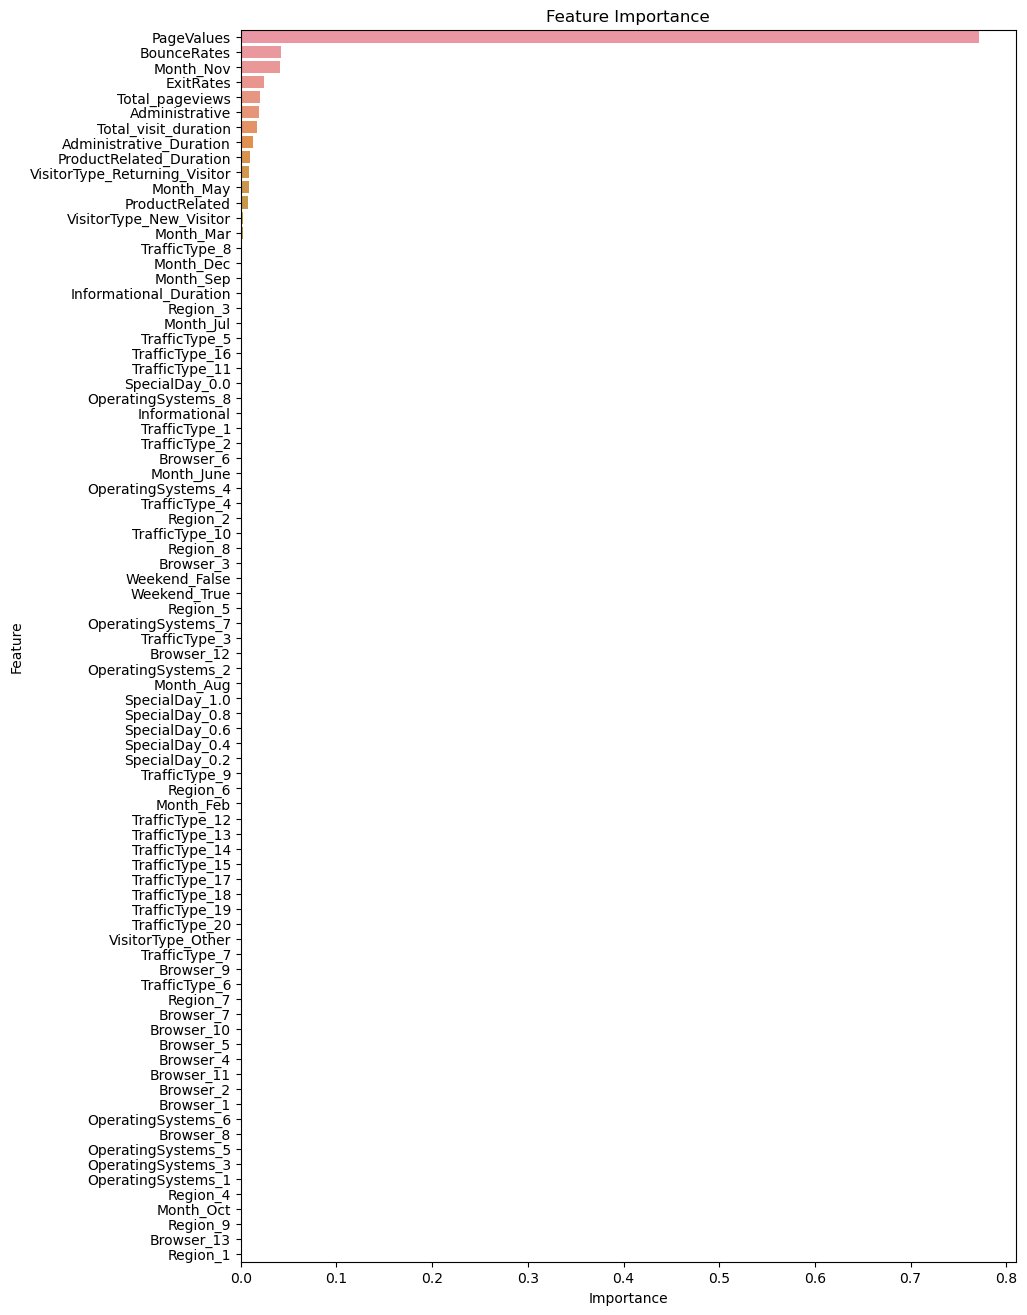

Nilai feature importance untuk masing-masing feature:
PageValues: 0.7713663241404194
BounceRates: 0.042451716719258493
Month_Nov: 0.04060898426026667
ExitRates: 0.024317911613409227
Total_pageviews: 0.020396575592427656
Administrative: 0.018844194608790926
Total_visit_duration: 0.016579084516699753
Administrative_Duration: 0.012591729398978397
ProductRelated_Duration: 0.009952306293490485
VisitorType_Returning_Visitor: 0.008437887653092106
Month_May: 0.008405809512538892
ProductRelated: 0.007353681657497521
VisitorType_New_Visitor: 0.0024710477280437265
Month_Mar: 0.0021941980395827473
TrafficType_8: 0.0017992184640265234
Month_Dec: 0.001556652001988046
Month_Sep: 0.0013038838574433137
Informational_Duration: 0.0008159350953846435
Region_3: 0.0006306436664325838
Month_Jul: 0.0006277397865769245
TrafficType_5: 0.0005931645453755308
TrafficType_16: 0.0005807454282400533
TrafficType_11: 0.000542214192866478
SpecialDay_0.0: 0.0005222034400043311
OperatingSystems_8: 0.0005038703159023531
In

In [55]:
# inisialisasi model terbaik dengan hyperparameter terbaik
best_model = gs.best_estimator_

# fit model terbaik dengan data train
best_model.fit(X_train, y_train)

# tampilkan feature importance
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
plt.figure(figsize=(10, 16))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# tampilkan nama feature beserta nilai feature importance-nya
print("Nilai feature importance untuk masing-masing feature:")
for index in sorted_idx:
    print(f"{X.columns[index]}: {feature_importance[index]}")

# save the figure to a file
fig.savefig("Feature Importance.png", dpi=300, bbox_inches="tight")

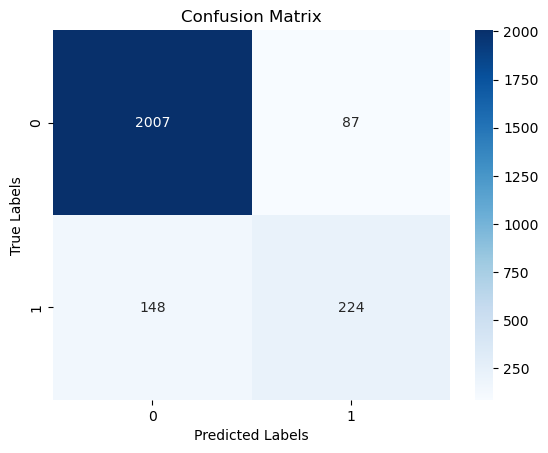

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2094
           1       0.72      0.60      0.66       372

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466



In [56]:
# predict dengan data test
y_test_pred = best_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("Before Threshold.png")
plt.show()

# classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

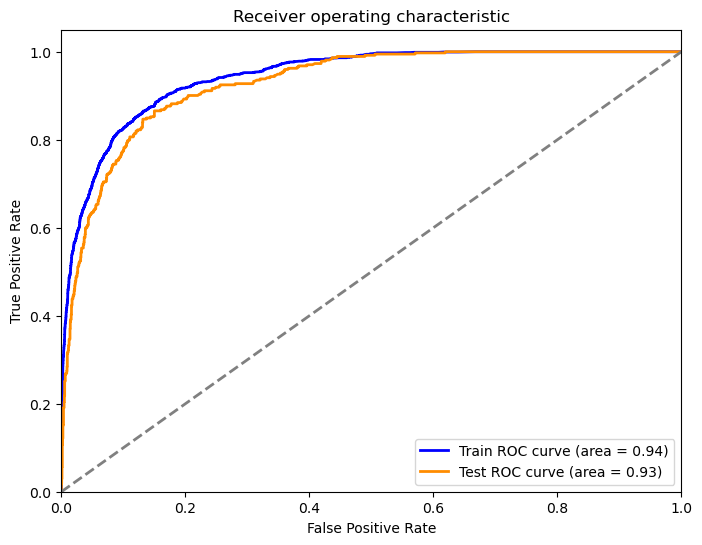

In [57]:
# predict dengan data train dan test
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# menghitung fpr, tpr, dan thresholds untuk train dan test
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# menghitung nilai auc untuk train dan test
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# plot ROC AUC Curve untuk train dan test
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_train,
    tpr_train,
    color="blue",
    lw=2,
    label="Train ROC curve (area = %0.2f)" % roc_auc_train,
)
plt.plot(
    fpr_test,
    tpr_test,
    color="darkorange",
    lw=2,
    label="Test ROC curve (area = %0.2f)" % roc_auc_test,
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("ROC AUC Curve.png")
plt.show()

# save the figure to a file
fig.savefig("plot ROC AUC Curve.png", dpi=300, bbox_inches="tight")

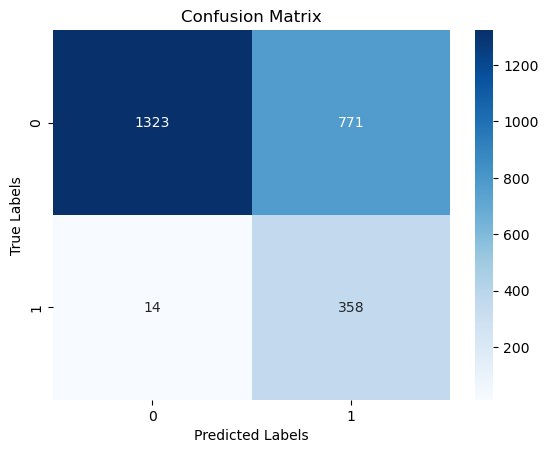

Classification Report (New Threshold):

              precision    recall  f1-score   support

           0       0.99      0.63      0.77      2094
           1       0.32      0.96      0.48       372

    accuracy                           0.68      2466
   macro avg       0.65      0.80      0.62      2466
weighted avg       0.89      0.68      0.73      2466



In [58]:
# menggeser threshold
new_threshold = 0.035
y_test_pred_new_thresh = (y_test_prob >= new_threshold).astype(int)

# menampilkan confusion matrix
cm1 = confusion_matrix(y_test, y_test_pred_new_thresh)
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("confusion_matrix.png")
plt.show()

# classification report untuk model dengan threshold baru
print("Classification Report (New Threshold):\n")
print(classification_report(y_test, y_test_pred_new_thresh))

Dalam konteks bisnis, TP (True Positive) mengacu pada kasus-kasus di mana model benar-benar mengidentifikasi peluang konversi (misalnya, pelanggan yang membeli produk atau mendaftar layanan), sedangkan FP (False Positive) mengacu pada kasus-kasus di mana model mengidentifikasi peluang konversi yang sebenarnya tidak terjadi (misalnya, memprediksi pelanggan akan membeli tetapi tidak).

Dalam hal konversi, TP dapat dianggap sebagai peluang untuk meningkatkan pendapatan, sementara FP dapat dianggap sebagai peluang yang hilang atau biaya tambahan yang tidak perlu. Oleh karena itu, model yang memiliki TP yang lebih tinggi dan FP yang lebih rendah dapat membantu bisnis dalam meningkatkan conversion rate dan mengoptimalkan anggaran pemasaran.

### Shap

In [59]:
best_model

GradientBoostingClassifier(learning_rate=0.05, random_state=42, subsample=0.9)

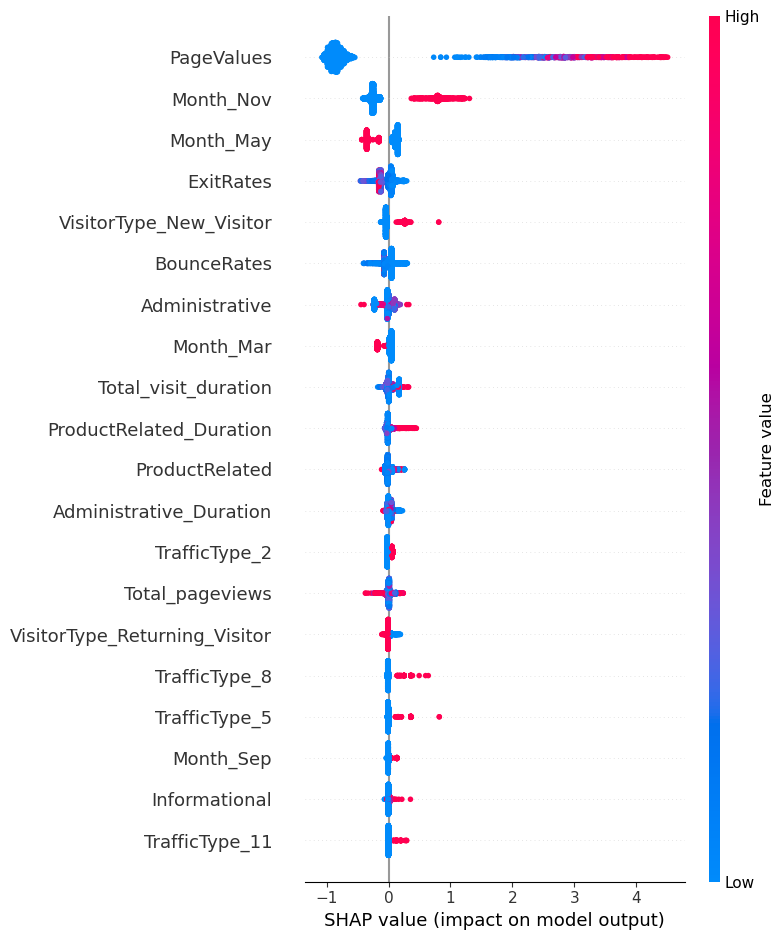

In [60]:
# inisialisasi explainer SHAP
explainer = shap.Explainer(best_model)

# hitung SHAP values pada data test
shap_values = explainer(X_test)

# tampilkan summary plot
shap.summary_plot(shap_values, X_test)

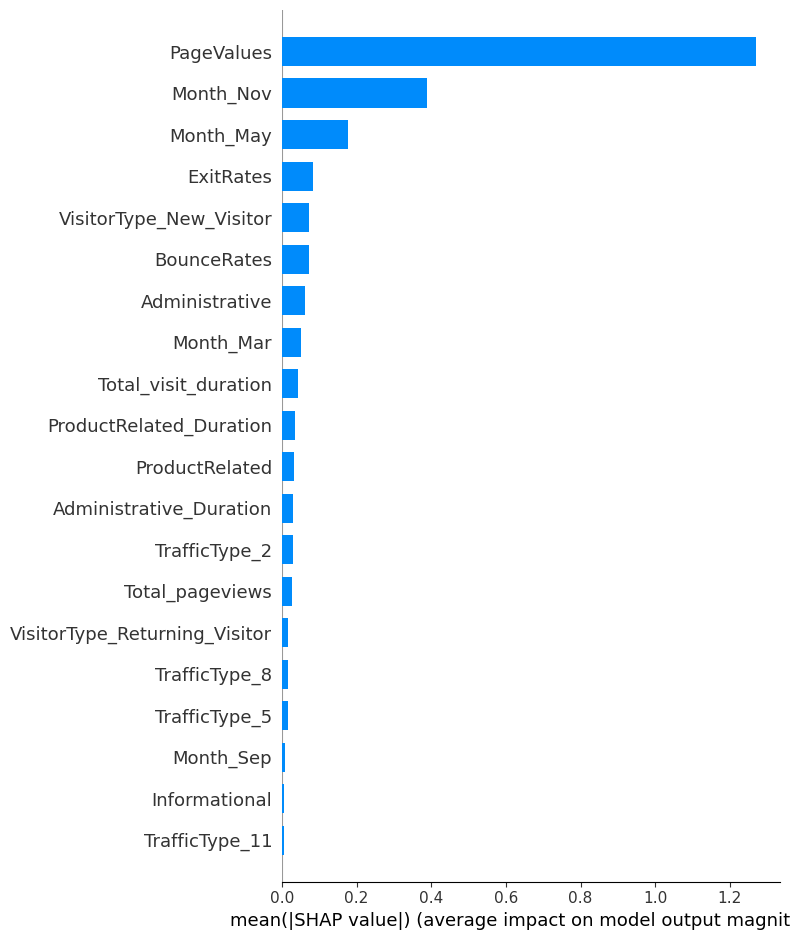

In [61]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [62]:
# ambil satu observasi pada data test
obs = X_test.iloc[[0]]

# hitung SHAP values untuk observasi tersebut
shap_values = explainer(obs)

# tampilkan force plot
shap.plots.force(shap_values[0])


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------